**Название: Разработка модели машинного обучения для отбора коров «ЭкоФермы» в поголовье молочного хозяйства «Вольный луг»**  

Заказчик: молочное хозяйство «Вольный луг»

## Введение

**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным - строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1. первая будет прогнозировать возможный удой коровы (целевой признак 'Удой')
2. вторая - рассчитывать вероятность получить вкусное молоко от коровы (целевой признак 'Вкус молока')

С помощью модели нужно отобрать коров по двум критериям:
1. средний удой за год - не менее 6000 килограммов
2. молоко должно быть вкусным

**Задачи исследования**

* провести предобработку и анализ данных
* обучить несколько моделей линейной регрессии
* выбрать лучшую модель линейной регрессии, с помощью которой спрогнозировать удой
* обучить модель логистической регрессии и подобрать для нее оптимальное пороговое значение
* с помощью модели логистической регрессии спрогнозировать вкус молока коров
* сделать выводы, дать рекомендации

**Цели исследования**

* создать две прогнозные модели для отбора бурёнок в поголовье:  
1. первая будет прогнозировать возможный удой коровы (целевой признак 'удой')  
2. вторая - рассчитывать вероятность получить вкусное молоко от коровы (целевой признак 'вкус молока')

* с помощью модели отобрать коров по двум критериям:  
1. средний удой за год — не менее 6000 килограммов  
2. молоко должно быть вкусным

**Данные для анализа**

ferma_main.csv - датасет с данными о стаде фермера на текущий момент (предоставил владелец молочного хозяйства «Вольный луг»)
ferma_dad.csv - датасет с именем папы каждой коровы в стаде фермера (предоставил владелец молочного хозяйства «Вольный луг») 
cow_buy.csv - датасет с данными о коровах «ЭкоФермы» (данные предоставлены ассоциацией пастбищ «ЭкоФерма»)

**Описание данных**

Датасет ferma_main.csv:

* *id* — уникальный идентификатор коровы
* *Удой, кг* — масса молока, которую корова даёт в год (в килограммах)
* *ЭКЕ (Энергетическая кормовая единица)* — показатель питательности корма коровы
* *Сырой протеин, г* — содержание сырого протеина в корме (в граммах)
* *СПО (Сахаро-протеиновое соотношение)* — отношение сахара к протеину в корме коровы
* *Порода* — порода коровы
* *Тип пастбища* — ландшафт лугов, на которых паслась корова
* *порода папы_быка* — порода папы коровы
* *Жирность,%* — содержание жиров в молоке (в процентах)
* *Белок,%* — содержание белков в молоке (в процентах)
* *Вкус молока* — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)
* *Возраст* — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)

Признаки в датасете ferma_main.csv можно разделить на группы (важно для понимания взаимосвязей признаков в датасете):

*Характеристики коровы*: id, Порода, порода папы_быка, Возраст  
*Характеристики корма*: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение)  
*Характеристика пастбища*: Тип пастбища  
*Характеристики молока*: Удой, кг, Жирность,%, Белок,%, Вкус молока  

Датасет ferma_dad.csv:
* *id* — уникальный идентификатор коровы
* *Имя Папы* — имя папы коровы

Датасет ferma_cow_buy.csv:

* *Порода* — порода коровы
* *Тип пастбища* — ландшафт лугов, на которых паслась корова
* *порода папы_быка* — порода папы коровы
* *Имя_папы* — имя папы коровы
* *Текущая_жирность,%* — содержание жиров в молоке (в процентах)
* *Текущий_уровень_белок,%* — содержание белков в молоке (в процентах)
* *Возраст* — возраст коровы, бинарный признак (менее 2 лет, более 2 лет)

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей:

Содержание белков и жиров в молоке указано на момент продажи - когда «ЭкоФерма» давала коровам свой корм  
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют  
Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.  
Кроме того, отсутствуют признаки Удой, кг и Вкус молока (это целевые признаки, которые предстоит предсказать)

**Этапы работы над проектом**

*Шаг 1.* Загрузка данных

*Шаг 2.* Предобработка данных:  
* работа с наименованиями столбцов  
* работа с дубликатами

*Шаг 3.* Исследовательский анализ данных  
* анализ признаков датасета herd  
* анализ признаков датасета dad_name  
* * анализ признаков датасета cows  
* вывод по результам исследовательского анализа

*Шаг 4.* Корреляционный анализ признаков в датасете herd  
* анализ взаимосвязи между признаками с помощью матрицы корреляции  
* построения диаграмм рассеяния для целевого / всех количественных признаков  
* вывод по результам корреляционного анализа

*Шаг 5.* Обучение модели линейной регрессии  
* обучение трех разных моделей линейной регрессии  
* сравнение качества моделей (R2, остатки)  
* сравнение качества моделей (MSE, MAE, RMSE)  
* прогноз целевого показателя (удой)

*Шаг 6.* Обучение модели логистической регрессии  
* обучение модели логистической регрессии  
* анализ модели логистической регрессии  
* подбор оптимального порога принадлежности к классам  
* прогноз целевого показателя (вкус молока)

*Шаг 7.* Итоговые выводы  
* результаты исследования, рекомендации

In [1064]:
pip install numpy==1.23.5

Note: you may need to restart the kernel to use updated packages.


In [1065]:
# подключение библиотек
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt, factorial
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from numpy import triu
import statistics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, \
    recall_score, confusion_matrix, precision_recall_curve

## Шаг 1. Загрузка данных

### Считаем и сохраним данные

Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

В датафрейме herd будут храниться данные о стаде фермера на текущий момент.
В датафрейме dad будет находиться имя папы каждой коровы в стаде фермера, а cows будет содержать данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

In [1066]:
# данные о стаде фермера на текущий момент
pth11 = '/datasets/ferma_main.csv'
pth12 = 'https://code.s3.yandex.net/datasets/ferma_main.csv'

if os.path.exists(pth11):
    herd = pd.read_csv(pth11, sep=';', decimal=',')
elif os.path.exists(pth12):
    herd = pd.read_csv(pth12, sep=';', decimal=',')
else:
    print('Файл не найден')

In [1067]:
# имя папы каждой коровы в стаде фермера
pth21 = '/datasets/ferma_dad.csv'
pth22 = 'https://code.s3.yandex.net/datasets/ferma_dad.csv'

if os.path.exists(pth21):
    dad = pd.read_csv(pth21, sep=';', decimal=',')
elif os.path.exists(pth22):
    dad = pd.read_csv(pth22, sep=';', decimal=',')
else:
    print('Файл не найден')

In [1068]:
# данные о коровах «ЭкоФермы»
pth31 = '/datasets/cow_buy.csv'
pth32 = 'https://code.s3.yandex.net/datasets/cow_buy.csv'

if os.path.exists(pth31):
    cows = pd.read_csv(pth31, sep=';', decimal=',')
elif os.path.exists(pth32):
    cows = pd.read_csv(pth32, sep=';', decimal=',')
else:
    print('Файл не найден')

### Изучение общей информации

Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

>В целях оптимизации кода для получения информации о каждом датафрейме создадим функцию **check_df**:

In [1069]:
def check_df(df):
    display(df.head()) # первые 5 строк
    print('')
    display(df.info()) # общая информация
    print('')
    display(df.columns) # наименования столбцов

#### Датафрейм с информацей о стаде фермера на текущий момент (herd)

In [1070]:
check_df(herd)

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возра

None

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

Итак, в датафрейме содержится: 634 строки (количество коров в стаде фермера на текущий момент), 12 столбцов (каждый столбец - параметр, который описывает корову).

Описание каждой коровы включает в себя следующие параметры:

**id** — уникальный идентификатор коровы  
**Удой, кг** — масса молока, которую корова даёт в год (в килограммах)  
**ЭКЕ (Энергетическая кормовая единица)** — показатель питательности корма коровы  
**Сырой протеин, г** — содержание сырого протеина в корме (в граммах)  
**СПО (Сахаро-протеиновое соотношение)** — отношение сахара к протеину в корме коровы  
**Порода** — порода коровы  
**Тип пастбища** — ландшафт лугов, на которых паслась корова  
**порода папы_быка** — порода папы коровы  
**Жирность,%** — содержание жиров в молоке (в процентах)  
**Белок,%** — содержание белков в молоке (в процентах)  
**Вкус молока** — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)  
**Возраст** — возраст коровы, бинарный признак (менее 2 лет, более 2 лет)

---
* Пропущенных значений не выявлено
* С типами данных все в порядке
* Названия столбцов cтоит изменить и привести к единому виду

#### Датафрейм с информацией об именах отцов каждой коровы в стаде фермера (dad)

In [1071]:
check_df(dad)

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

Index(['id', 'Имя Папы'], dtype='object')

Датафрейм содержит 629 строки и 2 столбца: **id** — уникальный идентификатор коровы, **Имя Папы** — имя папы коровы.  
Каждая строка - это связка: идентификатор коровы / имя папы коровы.

---
* Пропущенных значений не выявлено
* С типами данных все в порядке
* Названия столбцов cтоит изменить и привести к единому виду

#### Датафрейм с данными о коровах «ЭкоФермы» (cows)

In [1072]:
check_df(cows)

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

В датафрейме содержится: 20 строк (количество коров «ЭкоФермы»), 7 столбцов (каждый столбец - параметр, который описывает корову).

Описание каждой коровы включает в себя следующие параметры:

**Порода** — порода коровы  
**Тип пастбища** — ландшафт лугов, на которых паслась корова  
**порода папы_быка** — порода папы коровы  
**Имя_папы** — имя папы коровы  
**Текущая_жирность,%** — содержание жиров в молоке (в процентах)  
**Текущий_уровень_белок,%** — содержание белков в молоке (в процентах)  
**Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)

---
* Пропущенных значений не выявлено
* С типами данных все в порядке
* Названия столбцов cтоит изменить и привести к единому виду

---
Итак, мы считали CSV-файлы с данными и сохранили их в датафреймы herd, dad и cows. В всех трех датафреймах отсутствуют пропущенные значения, типы данных корректные, но названия столбцов следует изменить и привести к единому виду.

##  Шаг 2. Предобработка данных

### Работа с наименованиями столбцов

**В датафрейме herd** переименуем столбцы следующим образом:  
* 'id' - оставим без изменений
* 'Удой, кг' --> 'milk_yield_kg'
* 'ЭКЕ (Энергетическая кормовая единица)' --> 'energy_feed_unit'
* 'Сырой протеин, г' --> 'raw_protein_g'
* 'СПО (Сахаро-протеиновое соотношение)' --> 'sugar_protein_ratio'
* 'Порода' --> 'breed'
* 'Тип пастбища' --> 'pasture_type'
* 'порода папы_быка' --> 'dad_bull_breed'
* 'Жирность,%' --> 'fat_pct'
* 'Белок,%' --> 'protein_pct'
* 'Вкус молока' --> 'milk_taste'
* 'Возраст' --> 'age'

In [1073]:
herd.columns = ['id', 'milk_yield_kg', 'energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio', 'breed',\
                'pasture_type', 'dad_bull_breed', 'fat_pct', 'protein_pct', 'milk_taste', 'age']

---
**В датафрейме dad** столбец 'id' оставим без изменений, а столбец 'Имя Папы' переименуем в 'dad_name'

In [1074]:
#dad.columns = ['id', 'dad_name']

In [1075]:
dad.rename(columns={'Имя Папы': 'dad_name'}, inplace=True)

---
Рассмотрим **датафрейм cows**. Заметим, что аналогичные характеристики (с такими же наименованиями столбцов) содержатся датафрейме herd: 'Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст'; в датафрейме dad есть столбец 'Имя Папы'.

Таким образом, в датафрейме cows переименуем столбцы в соответствии:
* 'Порода' --> 'breed' 
* 'Тип пастбища' --> 'pasture_type'
* 'порода папы_быка' --> 'dad_bull_breed'
* 'Имя Папы' --> 'dad_name'
* 'Текущая_жирность,%' --> 'current_fat_pct'
* 'Текущий_уровень_белок,%' --> 'current_protein_pct'
* 'Возраст' --> 'age'   

In [1076]:
cows.columns = ['breed', 'pasture_type', 'dad_bull_breed', 'dad_name', 'current_fat_pct', 'current_protein_pct', 'age']

---
Выполним проверку:

In [1077]:
display(herd.columns)
display(dad.columns)
display(cows.columns)

Index(['id', 'milk_yield_kg', 'energy_feed_unit', 'raw_protein_g',
       'sugar_protein_ratio', 'breed', 'pasture_type', 'dad_bull_breed',
       'fat_pct', 'protein_pct', 'milk_taste', 'age'],
      dtype='object')

Index(['id', 'dad_name'], dtype='object')

Index(['breed', 'pasture_type', 'dad_bull_breed', 'dad_name',
       'current_fat_pct', 'current_protein_pct', 'age'],
      dtype='object')

### Работа с дубликатами

* **В первую очередь произведем поиск неявных дубликатов.**

Рассмотрим **датафрейм herd**, выведем все уникальные значения, которые содержатся в столбцах типа 'object':

In [1078]:
for i in herd.columns:
    if herd[i].dtype == 'object':
        print(f'В столбце {i} содержатся следующие уникальные значения: {herd[i].unique()}')

В столбце breed содержатся следующие уникальные значения: ['Вис Бик Айдиал' 'РефлешнСоверинг']
В столбце pasture_type содержатся следующие уникальные значения: ['Равнинное' 'Равнинные' 'Холмистое']
В столбце dad_bull_breed содержатся следующие уникальные значения: ['Айдиал' 'Соверин' 'Айдиалл']
В столбце milk_taste содержатся следующие уникальные значения: ['вкусно' 'не вкусно']
В столбце age содержатся следующие уникальные значения: ['более_2_лет' 'менее_2_лет']


Заметим, что в столбце 'pasture_type' (тип пастбища) есть одно значение, но записанное в разных вариациях: 'Равнинное' и 'Равнинные'; в столбце 'dad_bull_breed' (порода папы быка) аналогичная ситуация со значениями: 'Айдиал' и 'Айдиалл'. Приведем данные в соответствие.

In [1079]:
herd['pasture_type'] = herd['pasture_type'].replace('Равнинные', 'Равнинное')

In [1080]:
herd['dad_bull_breed'] = herd['dad_bull_breed'].replace('Айдиалл', 'Айдиал')

Также отметим в столбце 'breed' породу с названием 'РефлешнСоверинг'. Дублирующих значений нет, но название породы написано некорректно, корректная запись - 'Рефлекшн Соверинг'. Исправим это несоответствие:

In [1081]:
herd['breed'] = herd['breed'].replace('РефлешнСоверинг', 'Рефлекшн Соверинг')

---
**В датафрейме dad** выведем все уникальные значения, которые содержатся в столбцe 'dad_name':

In [1082]:
dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Все корректно, дублирующих значений не обнаружено.

---
Рассмотрим **датафрейм cows**, выведем все уникальные значения, которые содержатся в столбцах типа 'object':

In [1083]:
for i in cows.columns:
    if cows[i].dtype == 'object':
        print(f'В столбце {i} содержатся следующие уникальные значения: {cows[i].unique()}')

В столбце breed содержатся следующие уникальные значения: ['Вис Бик Айдиал' 'РефлешнСоверинг']
В столбце pasture_type содержатся следующие уникальные значения: ['холмистое' 'равнинное']
В столбце dad_bull_breed содержатся следующие уникальные значения: ['Айдиал' 'Соверин']
В столбце dad_name содержатся следующие уникальные значения: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
В столбце age содержатся следующие уникальные значения: ['более_2_лет' 'менее_2_лет']


Дублирующих значений не обнаружено, но есть некоторые несоответствия:

в столбце 'breed' (порода) название породы 'РефлешнСоверинг' - аналогичную ситуацию рассматривали выше в датафрйеме herd, корректная запись - 'Рефлекшн Соверинг'

в столбце 'pasture_type' (тип пастбища) значения 'холмистое' и 'равнинное' корректно будет прописать с прописной буквы - соответственно, как в датафрейме herd (возможно, пригодится для МО в дальнейшем)

In [1084]:
cows['breed'] = cows['breed'].replace('РефлешнСоверинг', 'Рефлекшн Соверинг')

In [1085]:
cows['pasture_type'] = cows['pasture_type'].replace('холмистое', 'Холмистое')

In [1086]:
cows['pasture_type'] = cows['pasture_type'].replace('равнинное', 'Равнинное')

---
Выполним проверку:

In [1087]:
print('В датафрейме herd в столбцах типа object содержатся следующие уникальные значения:')
print('')
for i in herd.columns:
    if herd[i].dtype == 'object':
        print(f'В столбце {i} содержатся следующие уникальные значения: {herd[i].unique()}')
print('')        
print('В датафрейме cows в столбцах типа object содержатся следующие уникальные значения:')
print('')        
for i in cows.columns:
    if cows[i].dtype == 'object':
        print(f'В столбце {i} содержатся следующие уникальные значения: {cows[i].unique()}')

В датафрейме herd в столбцах типа object содержатся следующие уникальные значения:

В столбце breed содержатся следующие уникальные значения: ['Вис Бик Айдиал' 'Рефлекшн Соверинг']
В столбце pasture_type содержатся следующие уникальные значения: ['Равнинное' 'Холмистое']
В столбце dad_bull_breed содержатся следующие уникальные значения: ['Айдиал' 'Соверин']
В столбце milk_taste содержатся следующие уникальные значения: ['вкусно' 'не вкусно']
В столбце age содержатся следующие уникальные значения: ['более_2_лет' 'менее_2_лет']

В датафрейме cows в столбцах типа object содержатся следующие уникальные значения:

В столбце breed содержатся следующие уникальные значения: ['Вис Бик Айдиал' 'Рефлекшн Соверинг']
В столбце pasture_type содержатся следующие уникальные значения: ['Холмистое' 'Равнинное']
В столбце dad_bull_breed содержатся следующие уникальные значения: ['Айдиал' 'Соверин']
В столбце dad_name содержатся следующие уникальные значения: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
В сто

* **После того, как выявили и удалили все неявные дубликаты, проведем проверку и удалим все явные дубликаты:**

Итак, в датафреймах herd и cows были обнаружены явные дубликаты, удалим:

In [1088]:
print('Количество дубликатов в датафрейме herd:', herd.duplicated().sum())
print('Количество дубликатов в датафрейме dad:', dad.duplicated().sum())
print('Количество дубликатов в датафрейме cows:', cows.duplicated().sum())

Количество дубликатов в датафрейме herd: 5
Количество дубликатов в датафрейме dad: 0
Количество дубликатов в датафрейме cows: 4


In [1089]:
herd = herd.drop_duplicates().reset_index(drop=True) # удаляем явные дубликаты в датафрейме herd

In [1090]:
cows = cows.drop_duplicates().reset_index(drop=True) # удаляем явные дубликаты в датафрейме cows

In [1091]:
print('Количество дубликатов ПОСЛЕ УДАЛЕНИЯ в датафрейме herd:', herd.duplicated().sum())
print('Количество дубликатов ПОСЛЕ УДАЛЕНИЯ в датафрейме cows:', cows.duplicated().sum())

Количество дубликатов ПОСЛЕ УДАЛЕНИЯ в датафрейме herd: 0
Количество дубликатов ПОСЛЕ УДАЛЕНИЯ в датафрейме cows: 0


In [1092]:
print('Информация о датасете herd после преобразований')
check_df(herd)
print(' ')
print('Информация о датасете dad после преобразований')
check_df(dad)
print(' ')
print('Информация о датасете cows после преобразований')
check_df(cows)

Информация о датасете herd после преобразований


id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
0   1           5863              14.2           1743                0.890   
1   2           5529              12.8           2138                0.890   
2   3           5810              14.0           1854                0.885   
3   4           5895              12.4           2012                0.885   
4   5           5302              12.8           1675                0.885   

               breed pasture_type dad_bull_breed  fat_pct  protein_pct  \
0     Вис Бик Айдиал    Равнинное         Айдиал     3.58        3.076   
1     Вис Бик Айдиал    Равнинное        Соверин     3.54        3.079   
2  Рефлекшн Соверинг    Холмистое        Соверин     3.59        3.074   
3  Рефлекшн Соверинг    Холмистое         Айдиал     3.40        3.075   
4     Вис Бик Айдиал    Равнинное        Соверин     3.73        3.073   

  milk_taste          age  
0     вкусно  более_2_лет  
1     вкусно  менее_2_лет  
2  не вкусно  более_2_лет  
3  не вкусно  более_2_лет  
4     вкусно  менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield_kg        629 non-null    int64  
 2   energy_feed_unit     629 non-null    float64
 3   raw_protein_g        629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   pasture_type         629 non-null    object 
 7   dad_bull_breed       629 non-null    object 
 8   fat_pct              629 non-null    float64
 9   protein_pct          629 non-null    float64
 10  milk_taste           629 non-null    object 
 11  age                  629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


None

Index(['id', 'milk_yield_kg', 'energy_feed_unit', 'raw_protein_g',
       'sugar_protein_ratio', 'breed', 'pasture_type', 'dad_bull_breed',
       'fat_pct', 'protein_pct', 'milk_taste', 'age'],
      dtype='object')

 
Информация о датасете dad после преобразований


id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

Index(['id', 'dad_name'], dtype='object')

 
Информация о датасете cows после преобразований


breed pasture_type dad_bull_breed  dad_name  current_fat_pct  \
0     Вис Бик Айдиал    Холмистое         Айдиал  Геркулес             3.58   
1     Вис Бик Айдиал    Равнинное        Соверин    Буйный             3.54   
2  Рефлекшн Соверинг    Равнинное        Соверин     Барин             3.59   
3  Рефлекшн Соверинг    Холмистое         Айдиал    Буйный             3.40   
4  Рефлекшн Соверинг    Равнинное         Айдиал    Буйный             3.64   

   current_protein_pct          age  
0                3.076  более_2_лет  
1                3.081  менее_2_лет  
2                3.074  более_2_лет  
3                3.061  более_2_лет  
4                3.074  более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                16 non-null     object 
 1   pasture_type         16 non-null     object 
 2   dad_bull_breed       16 non-null     object 
 3   dad_name             16 non-null     object 
 4   current_fat_pct      16 non-null     float64
 5   current_protein_pct  16 non-null     float64
 6   age                  16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


None

Index(['breed', 'pasture_type', 'dad_bull_breed', 'dad_name',
       'current_fat_pct', 'current_protein_pct', 'age'],
      dtype='object')

---
**Вывод:**

1. Названия столбцов были изменены и приведены к единому виду.

* В датафрейме herd:
 
'Удой, кг' --> 'milk_yield_kg'  
'ЭКЕ (Энергетическая кормовая единица)' --> 'energy_feed_unit'  
'Сырой протеин, г' --> 'raw_protein_g'  
'СПО (Сахаро-протеиновое соотношение)' --> 'sugar_protein_ratio'  
'Порода' --> 'breed'  
'Тип пастбища' --> 'pasture_type'  
'порода папы_быка' --> 'dad_bull_breed'  
'Жирность,%' --> 'fat_pct'  
'Белок,%' --> 'protein_pct'  
'Вкус молока' --> 'milk_taste'  
'Возраст' --> 'age'

* В датафрейме dad: 'Имя Папы' --> 'dad_name'


* В датафрейме cows:

'Порода' --> 'breed'  
'Тип пастбища' --> 'pasture_type'  
'порода папы_быка' --> 'dad_bull_breed'  
'Имя Папы' --> 'dad_name'  
'Текущая_жирность,%' --> 'current_fat_pct'  
'Текущий_уровень_белок,%' --> 'current_protein_pct'  
'Возраст' --> 'age'

---
2. Была проведена работа с дубликатами:
* в датафрейме herd в столбце 'pasture_type' были удалены неявные дубликаты 'Равнинное'/'Равнинные', в столбце 'dad_bull_breed' - 'Айдиал'/'Айдиалл'
* в датафрейме dad неявные дубликаты обнаружены не были
* в датафрейме cows неявные дубликаты обнаружены не были, но были найдены и исправлены несоответствия в столбце 'pasture_type': значения 'холмистое' и 'равнинное' - первые буквы строчные изменили на прописные (возможно, пригодится для МО в дальнейшем)

Также в датафреймах herd и cows в столбце 'breed' название породы 'РефлешнСоверинг' исправили на 'Рефлекшн Соверинг' (особого значения это не имеет, но это корректное написание данной породы)

В результате в датафрейме herd было удалено 5 явных дубликатов, а в датафрейме cows - 4 явных дубликата.

## Шаг 3. Исследовательский анализ данных

>В целях оптимизации кода для построения графиков количественных признаков (графика распределения и диаграммы размаха) создадим функцию **graphs_col**:  

на входе функция принимает название датасета (df), название признака (feature) и количество корзин для построения графика распределения (number_bins)  
результат работы функции - график распределения и диаграмма размаха для указанного признака

In [1093]:
def graphs_col (df, feature, number_bins):
    
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[feature], edgecolor='black', bins=number_bins)
    plt.title(f'Распределение признака {feature}', fontsize=15)
    plt.ylabel('плотность распределения', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=14)

    plt.subplot(1, 2, 2)
    df.boxplot(column=feature, fontsize=14)
    plt.title(f'Диаграмма размаха для параметра {feature}', fontsize=15)
    plt.ylabel(f'{feature}', fontsize=14)
    plt.show()

>В целях оптимизации кода для построения графиков категориальных признаков (столбчатой и круговой диаграмм) создадим функцию **graphs_cat**:

на входе функция принимает название датасета (df) и название признака (feature)  
результат работы функции - столбчатая и круговая диаграмма для указанного признака

In [1094]:
def graphs_cat (df, feature):
    
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    df.groupby(feature)[feature].count().plot(kind='bar')
    plt.title(f'{feature} / количество', fontsize=15)
    plt.xticks(rotation=0)
    plt.xlabel(f'{feature}', fontsize=14)
    plt.ylabel('количество', fontsize=14)

    plt.subplot(1, 2, 2)
    plt.title(f'Круговая диаграмма: {feature}', fontsize=15)
    df.groupby(feature)[feature].count().plot(
                                    kind='pie',
                                    colors=['steelblue', 'grey', 'pink', 'orange'],
                                    autopct='%1.0f%%',
                                    subplots=True)
    plt.show()

### Датасет herd - анализ признаков

В датасете herd содержатся и количественные и категориальные признаки.

Сначала рассмотрим все **количественные признаки**, для каждого из них построим график и проведем анализ.

Количественные признаки датасета herd:  

* **milk_yield_kg** (удой, кг)  
* **energy_feed_unit** (ЭКЕ / энергетическая кормовая единица)  
* **raw_protein_g** (сырой протеин, г)  
* **sugar_protein_ratio** (СПО / cахаро-протеиновое соотношение)  
* **fat_pct** (жирность, %)  
* **protein_pct** (белок, %) 

Рассмотрим основные статистические характеристики количественных признаков датасета herd:

In [1095]:
herd.describe().T

count         mean          std       min       25%  \
id                   629.0   315.000000   181.720940     1.000   158.000   
milk_yield_kg        629.0  6188.750397  1644.795489  5204.000  5751.000   
energy_feed_unit     629.0    14.543879     1.306408    10.900    13.500   
raw_protein_g        629.0  1923.364070   182.956251  1660.000  1771.000   
sugar_protein_ratio  629.0     0.913116     0.032203     0.840     0.890   
fat_pct              629.0     3.603657     0.168656     2.990     3.590   
protein_pct          629.0     3.075671     0.002549     3.069     3.074   

                          50%       75%        max  
id                    315.000   472.000    629.000  
milk_yield_kg        6133.000  6501.000  45616.000  
energy_feed_unit       14.700    15.600     16.800  
raw_protein_g        1888.000  2062.000   2349.000  
sugar_protein_ratio     0.930     0.940      0.960  
fat_pct                 3.650     3.720      3.750  
protein_pct             3.076     3.077      3.085

В целом по статистическим показателям значения всех показателей кажутся вполне реалистичными. Единственный момент - это аномально большое максимальное значение показателя 'milk_yield_kg'.

Далее рассмотрим каждый из признаков по отдельности.

#### 'milk_yield_kg' (удой, кг) 

In [1096]:
herd['milk_yield_kg'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield_kg, dtype: float64

Удой - это масса молока в килограммах, которую корова даёт в течение года.

Изучив статистическую информацию, можно заметить, что максимальное значение удоя составляет 45616 кг - это значит, что максимальное количество молока, которое корова дает в течение года, составляет 45616 кг (~ 46 тонн!!). Данное значение кажется неправдоподобным.

In [1097]:
herd['milk_yield_kg'].sort_values(ascending=False).head() # выведем 5 максимальных значений показателя удой

16     45616
70      7222
135     7207
296     7201
294     7197
Name: milk_yield_kg, dtype: int64

Для параметра 'milk_yield_kg' построим график распределения и диаграмму размаха. В этом случае функцию graphs_col использовать не будем, поскольку потребуется установить пределы графика по горизонтальной оси plt. xlim(x_min, x_max).

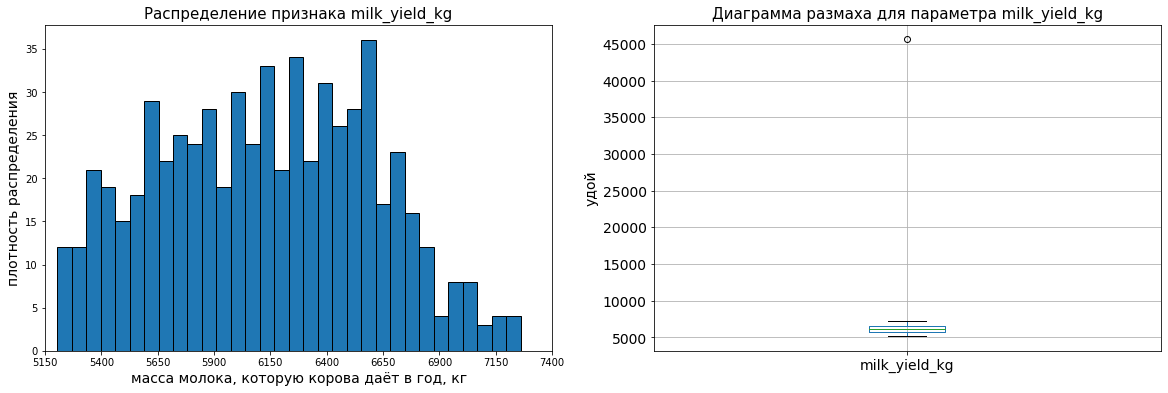

In [1098]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(herd['milk_yield_kg'], edgecolor='black', bins=629)
plt.xlim(5204, 7222)
plt.xticks(np.arange(5150, 7450, 250))
plt.title('Распределение признака milk_yield_kg', fontsize=15)
plt.ylabel('плотность распределения', fontsize=14)
plt.xlabel('масса молока, которую корова даёт в год, кг', fontsize=14)

plt.subplot(1, 2, 2)
herd.boxplot(column='milk_yield_kg', fontsize=14)
plt.title('Диаграмма размаха для параметра milk_yield_kg', fontsize=15)
plt.ylabel('удой', fontsize=14)
plt.show()

В целом распределение признака 'milk_yield_kg' выглядит нормальным.  
Как видно на диаграмме размаха, значение 45616 кг - это выброс, оптимальным решением будет удалить строку с выбросом из рассмотрения.

In [1099]:
herd = herd.query('milk_yield_kg != 45616') # удалим 1 строку с выбросом

In [1100]:
herd['milk_yield_kg'].max() # проверка

7222

#### 'energy_feed_unit' (ЭКЕ / энергетическая кормовая единица)

In [1101]:
herd['energy_feed_unit'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64

ЭКЕ / энергетическая кормовая единица - показатель питательности корма коровы.  
Построим график распределения и диаграмму размаха для показателя 'energy_feed_unit'

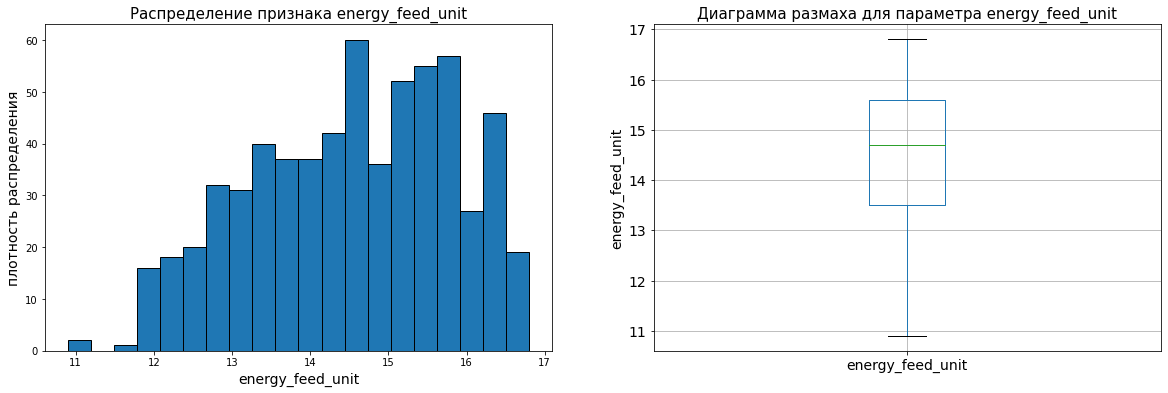

In [1102]:
graphs_col (herd, 'energy_feed_unit', 20)

Распределение признака - близкое к нормальному. На графике распределения наблюдаются пиковые значения на отметках 14.7 и 15.7.  
Выбросов нет, данные готовы к дальнейшему использованию.

#### 'raw_protein_g' (cырой протеин, г)

In [1103]:
herd['raw_protein_g'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein_g, dtype: float64

Данный показатель отображает, сколько грамм сырого протеина содержится в корме.  
Построим график распределения и диаграмму размаха для показателя 'raw_protein_g'.

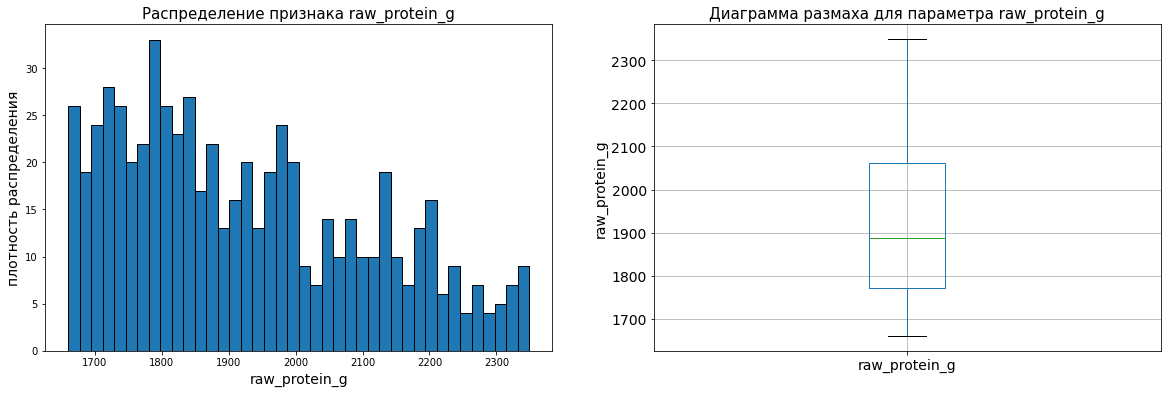

In [1104]:
graphs_col (herd, 'raw_protein_g', 40)

Распределение данного признака в целом нормализовано. Можно заметить небольшой перевес в сторону значений меньше 2100.  
Выбросы или аномальные значения не обнаружены.

#### 'sugar_protein_ratio' (СПО / cахаро-протеиновое соотношение)

In [1105]:
herd['sugar_protein_ratio'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64

СПО / cахаро-протеиновое соотношение - это отношение сахара к протеину в корме коровы.  
Построим график распределения и диаграмму размаха для показателя 'sugar_protein_ratio'.

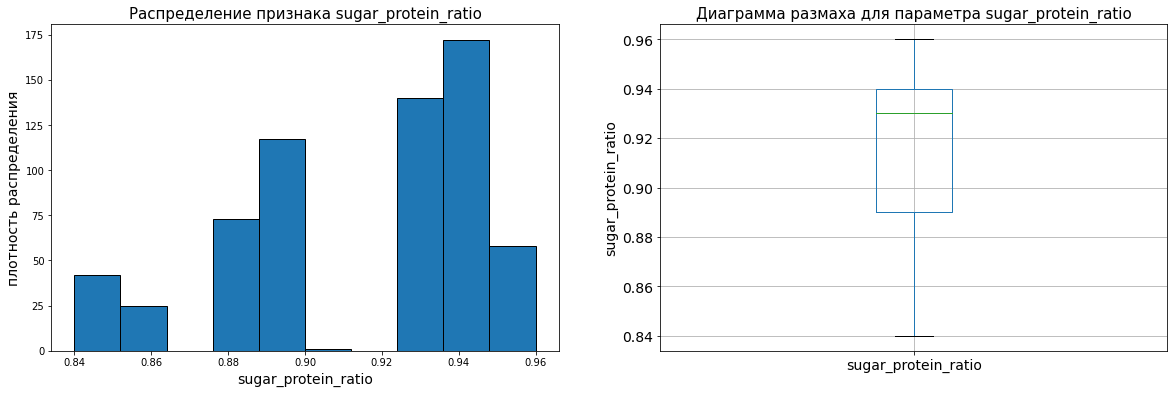

In [1106]:
graphs_col (herd, 'sugar_protein_ratio', 10)

Распределение данных похоже на нормальное ассиметричное, но в данных есть пропуски - можно предположить, что это связано со спецификой признака. Если есть возможность, желательно уточнить у фермера, как расчитывали данный показатель, а именно - каким образом измеряли количество сахара и протеина в корме коровы. Возможно, пропуски в данных связаны с прибором, с помощью которого производили измерения (возможно, причина в его настройках).

Заметим, что большинство записей приходится на значения 0.94.   
Выбросы или аномальные значения не обнаружены.

#### 'fat_pct' (жирность, %) 

In [1107]:
herd['fat_pct'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_pct, dtype: float64

Данный показатель отображает процент жирности молока.  
Построим график распределения и диаграмму размаха для показателя 'fat_pct'.

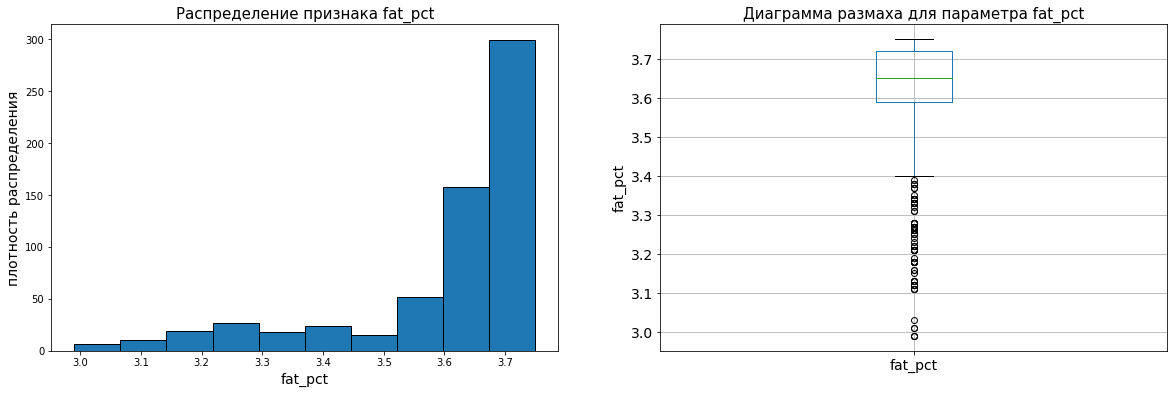

In [1108]:
graphs_col (herd, 'fat_pct', 10)

Распределение не похоже на нормальное. Желательно уточнить у фермера, каким образом измеряли данный показатель. Возможно, прибор, с помощью которого производили измерения настроен таким образом, что показывает значения только до определенного максимального (выше определенного значения - информации нет).

Заметим, что большинство записей приходится на значение 3.7. В целом данные выглядят реалистично.

Благодаря диаграмме размаха удалось выяснить, что значение 3.4 является нижней границей, после которой значения параметра 'fat_pct' являются выбросами. Проверим, сколько всего строк с выбросами содержится в нашей датафрейме и какой процент они составляют от всего датафрейма:

In [1109]:
number = len(herd.query('fat_pct < 3.4'))
percent = round(len(herd.query('fat_pct < 3.4')) / len(herd) * 100, 2)
print(f'Всего строк с выбросами: {number}, что составляет {percent} % от всего датафрейма herd')

Всего строк с выбросами: 86, что составляет 13.69 % от всего датафрейма herd


Итак, доля строк с выбросами составляет 13.69 % от всего датафрейма, это довольно большое значение - удаление всех таких строк может существенно повлиять на результаты исследования. Таким образом, оптимальное решение в этом случае - оставить данные строки с выбросами.

#### 'protein_pct' (белок, %) 

In [1110]:
herd['protein_pct'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_pct, dtype: float64

Данный показатель отображает процент содержания белка в молоке.
Построим график распределения и диаграмму размаха для показателя 'protein_pct'.

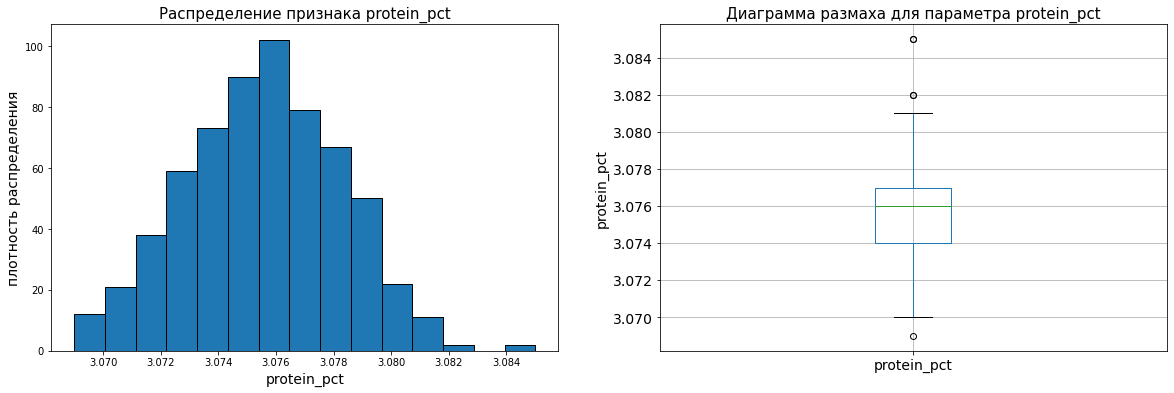

In [1111]:
graphs_col (herd, 'protein_pct', 15)

Распределение нормальное.  
На диаграмме размаха видим выбросы. Зададим ограничение (3.0695, 3.0815) и повторно построим диаграмму размаха, чтобы корректно определить границы отсечения данных:

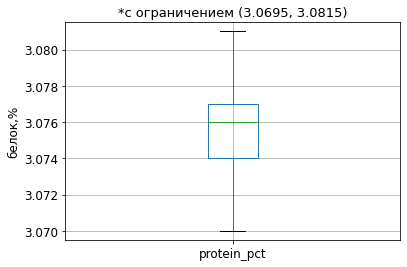

In [1112]:
herd.boxplot(column='protein_pct', fontsize=12)
plt.title('*с ограничением (3.0695, 3.0815)', fontsize=13)
plt.ylabel('белок,%', fontsize=12)
plt.ylim(3.0695, 3.0815)
plt.show()

In [1113]:
number = len(herd.query('protein_pct < 3.070 or protein_pct > 3.0815'))
percent = round(len(herd.query('protein_pct < 3.070 or protein_pct > 3.0815')) / len(herd) * 100, 2)
print(f'Всего строк с выбросами: {number}, что составляет {percent} % от всего датафрейма herd')

Всего строк с выбросами: 5, что составляет 0.8 % от всего датафрейма herd


In [1114]:
herd.query('protein_pct < 3.070 or protein_pct > 3.0815')

id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
77    78           5871              14.7           1795                0.895   
240  241           5568              13.4           1733                0.880   
426  427           6701              15.7           2068                0.940   
471  472           5883              14.9           2159                0.890   
517  518           5819              13.7           1968                0.840   

                 breed pasture_type dad_bull_breed  fat_pct  protein_pct  \
77      Вис Бик Айдиал    Равнинное         Айдиал     3.61        3.082   
240     Вис Бик Айдиал    Равнинное        Соверин     3.63        3.069   
426  Рефлекшн Соверинг    Холмистое         Айдиал     3.72        3.082   
471     Вис Бик Айдиал    Равнинное        Соверин     3.62        3.085   
517     Вис Бик Айдиал    Холмистое         Айдиал     3.15        3.085   

    milk_taste          age  
77      вкусно  более_2_лет  
240  не вкусно  менее_2_лет  
426     вкусно  более_2_лет  
471     вкусно  более_2_лет  
517     вкусно  более_2_лет

Итак, выбросами являются все значения ниже 3.070 и выше 3.0815. Строк с выбросами незначительное количество - всего 5 (на диаграмме рассеяния видим только три точки, но можно заметить, что в столбце 'protein_pct' две строки имеют значение 3.085 и две строки - значение 3.082).  

Количество строк с выбросами составляет 0.8 % от всего датафрейма, поэтому оптимальное решение - удалить эти строки.

In [1115]:
len(herd) # количество строк ДО удаления выбросов

628

In [1116]:
herd = herd.query('3.070 <= protein_pct <= 3.0815')

In [1117]:
len(herd) # количество строк ПОСЛЕ удаления выбросов (проверка)

623

---
Рассмотрим все **категориальные признаки** датасета herd, для каждого из них также построим график и проведем анализ.

Категориальные признаки датасета herd:  

* **breed** (порода)  
* **pasture_type** (тип пастбища)  
* **dad_bull_breed** (порода папы быка)  
* **milk_taste** (вкус молока)  
* **age** (возраст)

#### 'breed' (порода коровы) 

In [1118]:
herd.groupby('breed')['breed'].count()

breed
Вис Бик Айдиал       368
Рефлекшн Соверинг    255
Name: breed, dtype: int64

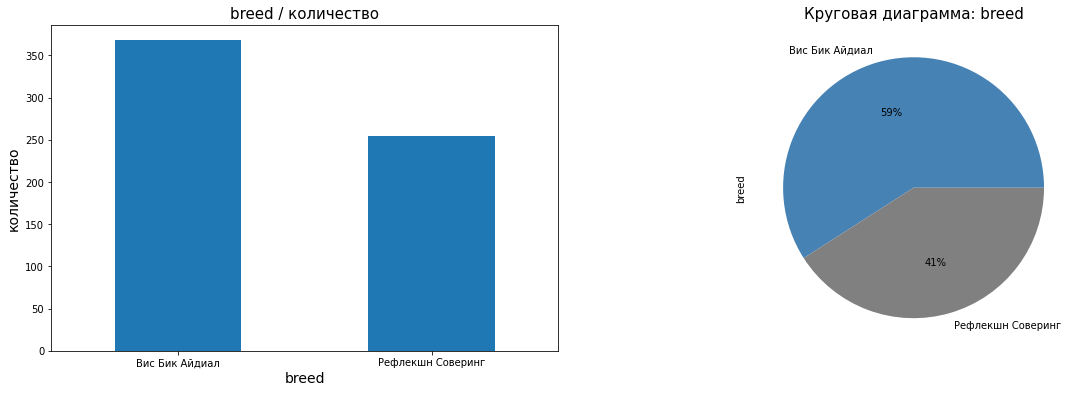

In [1119]:
graphs_cat (herd, 'breed')

В стаде фермера есть коровы двух пород: Вис Бик Айдиал и Рефлекшн Соверинг. Коров породы Вис Бик Айдиал - 368, что составляет 59 % от общего количества коров в стаде. Коров породы Рефлекшн Соверинг - 255 (41 %).

#### 'pasture_type' (тип пастбища) 

In [1120]:
herd.groupby('pasture_type')['pasture_type'].count()

pasture_type
Равнинное    275
Холмистое    348
Name: pasture_type, dtype: int64

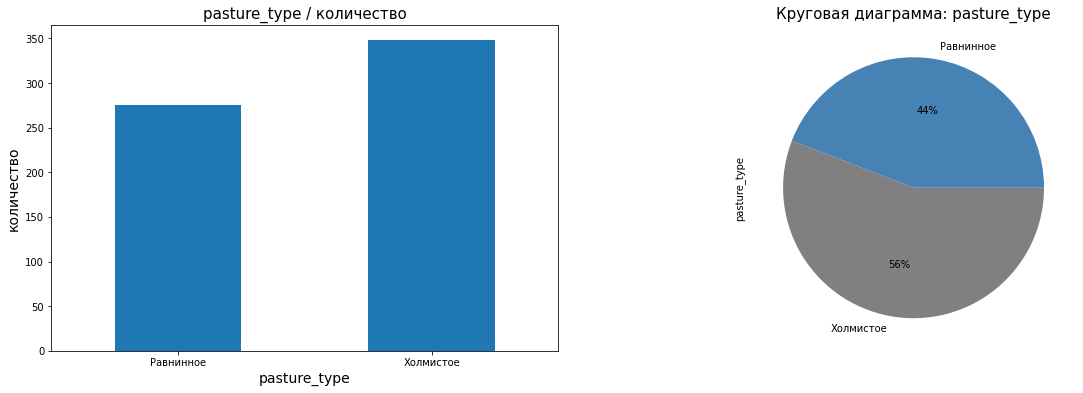

In [1121]:
graphs_cat (herd, 'pasture_type')

Тип пастбища - это ландшафт лугов, на которых паслась корова. Коровы фермера пасутся на пастбищах двух типов: равнинное и холмистое. Заметим, что большинство коров в стаде фермера пасутся на холмистом пастбище - 348 коров (56 % от общего количества) и 275 коров - на равнинном (44 %).

#### 'dad_bull_breed' (порода папы-быка) 

In [1122]:
herd.groupby('dad_bull_breed')['dad_bull_breed'].count()

dad_bull_breed
Айдиал     314
Соверин    309
Name: dad_bull_breed, dtype: int64

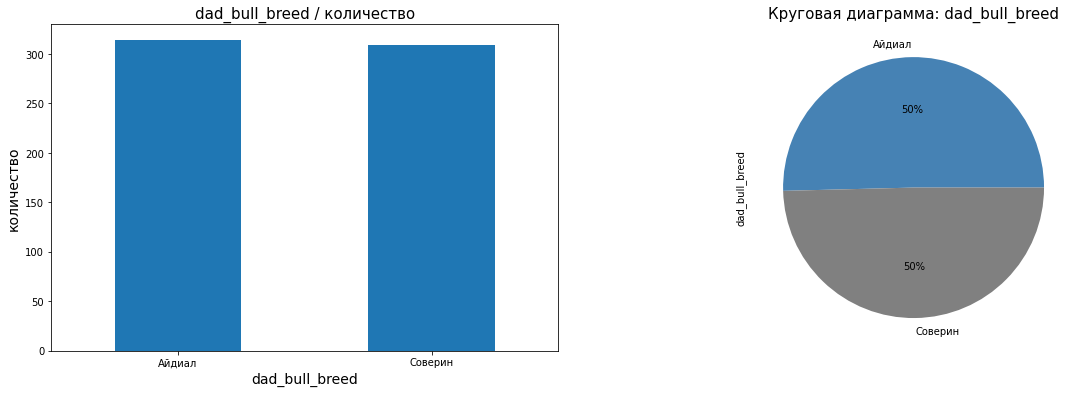

In [1123]:
graphs_cat (herd, 'dad_bull_breed')

У половины стада - папа породы Айдиал (314 коровы), у половины стада - породы Соверин (309 коров).

#### 'milk_taste' (вкус молока) 

In [1124]:
herd.groupby('milk_taste')['milk_taste'].count()

milk_taste
вкусно       366
не вкусно    257
Name: milk_taste, dtype: int64

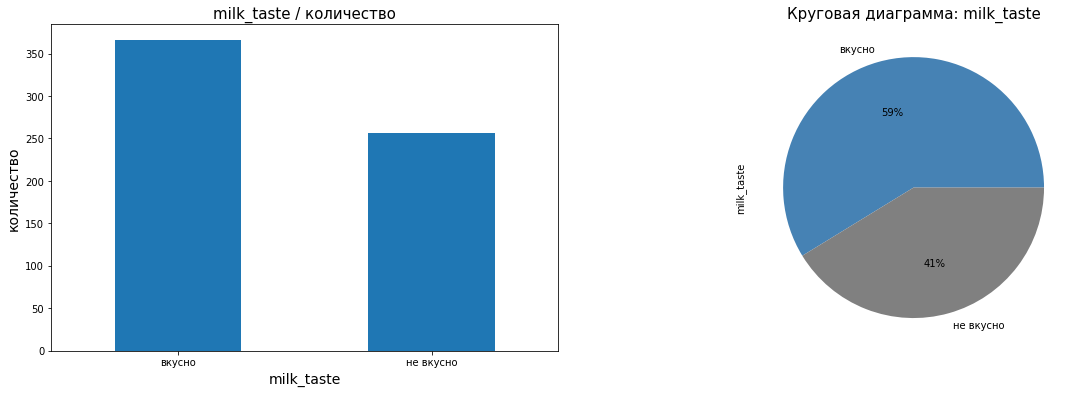

In [1125]:
graphs_cat (herd, 'milk_taste')

Вкус молока - это бинарный признак (вкусно / не вкусно). Оценка вкуса производилась по личным критериям фермера. Заметим, что вкусным фермер посчитал молоко 366 коров (59 % от общего количества коров), невкусным - молоко 257 коров (41 %).

#### 'age' (возраст)

In [1126]:
herd.groupby('age')['age'].count()

age
более_2_лет    514
менее_2_лет    109
Name: age, dtype: int64

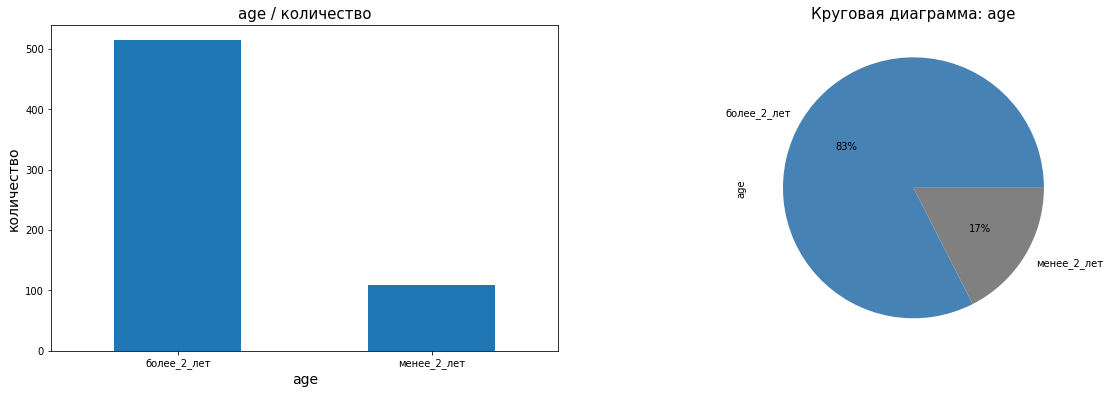

In [1127]:
graphs_cat (herd, 'age')

По возрастному критерию все коровы в стаде делятся на 2 категории: 'менее 2 лет', 'более 2 лет'. Заметим, что коров возраста 'более 2 лет' в стаде больше практически в 5 раз: 514 коров 'более 2 лет' (83 % от всего стада) и только 109 коров 'менее 2 лет' (17 %).

### Датасет dad - анализ признаков

In [1128]:
dad.head().T

0         1      2       3      4
id             1         2      3       4      5
dad_name  Буйный  Соловчик  Барин  Буйный  Барин

Датасет dad состоит всего из двух столбцов - id (уникальный идентификатор коровы) и 'dad_name' (имя папы-быка).  
Рассмотрим параметр 'dad_name'.

#### 'dad_name' (имя папы-быка)

In [1129]:
dad.groupby('dad_name')['dad_name'].count()

dad_name
Барин       240
Буйный      215
Геркулес     64
Соловчик    110
Name: dad_name, dtype: int64

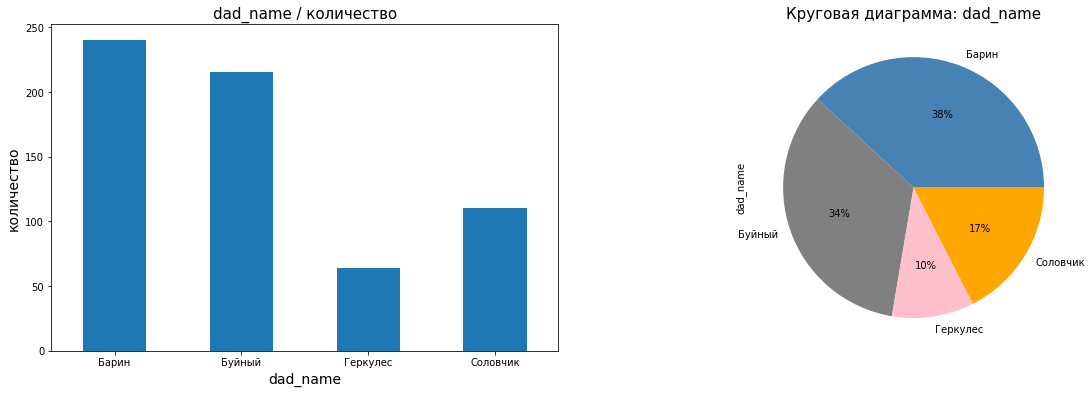

In [1130]:
graphs_cat (dad, 'dad_name')

Итак, в стаде есть коровы-дочери от четырех разных отцов. Первое место по количеству дочерей в этом стаде занимает бык Барин (он папа 240 коров, что составляет 38 % всего стада), второе место - бык Буйный (215 коров / 34 %), третье место у быка Соловчика (110 коров / 17 %) и последнее место у Геркулеса (всего 64 коровы / 10 %).

### Датасет cows - анализ признаков

В датасете cows находятся данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Датасет небольшой - в нем содержится всего 16 строк («ЭкоФерма» выставила на продажу 16 коров).  Датасет cows содержит и количественные, и категориальные признаки.

Сначала рассмотрим все **количественные признаки**, для каждого из них построим график и проведем анализ.

Количественные признаки датасета herd:

* **current_fat_pct** (текущая_жирность, %)
* **current_protein_pct** (текущий уровень белка, %)

Рассмотрим основные статистические характеристики количественных признаков датасета herd:

In [1131]:
cows.describe()

current_fat_pct  current_protein_pct
count        16.000000            16.000000
mean          3.571875             3.068250
std           0.141620             0.011264
min           3.340000             3.046000
25%           3.415000             3.059500
50%           3.585000             3.073500
75%           3.692500             3.076750
max           3.770000             3.081000

#### 'current_fat_pct' (текущая жирность, %)

In [1132]:
cows['current_fat_pct'].describe()

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: current_fat_pct, dtype: float64

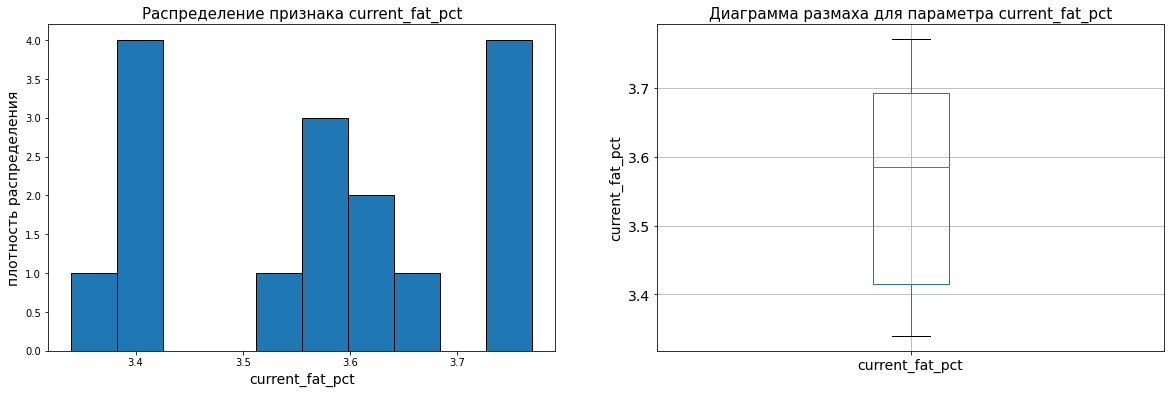

In [1133]:
graphs_col (cows, 'current_fat_pct', 10)

Текущая жирность - это процент содержания жиров в молоке на момент продажи.

Распределение - не является нормальным. Вспомним, что в файле с данными, который предоставила «ЭкоФерма», содержание белков и жиров в молоке указано на момент продажи. Таким образом, в данных содержатся результаты только одного измерения, что объясняет такое распределение показателя.

Заметим, что большинство записей приходится на значения 3.4 и 3.75.
Выбросы или аномальные значения не обнаружены.

#### 'current_protein_pct' (текущий уровень белка, %)

In [1134]:
cows['current_protein_pct'].describe()

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: current_protein_pct, dtype: float64

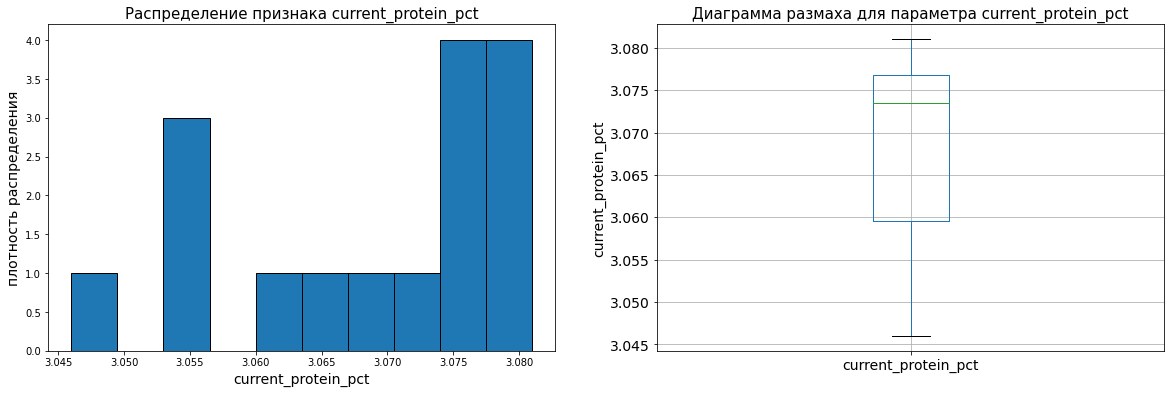

In [1135]:
graphs_col (cows, 'current_protein_pct', 10)

Текущий уровень белка - это процент содержания белков в молоке на момент продажи.

Распределение - не является нормальным. Аналогично, как и в ситуации с показателем текущей жирности, вспомним, что в файле с данными, который предоставила «ЭкоФерма», содержание белков и жиров в молоке указано на момент продажи. Таким образом, данные содержат результаты только одного измерения, что объясняет такое распределение показателя.

Заметим, что большинство записей приходится на значения 3.075 и 3.08.
Выбросы или аномальные значения не обнаружены.

---
Рассмотрим все **категориальные признаки** датасета cows, для каждого из них также построим график и проведем анализ.

Категориальные признаки датасета cows:  

* **breed** (порода)
* **pasture_type** (тип пастбища)
* **dad_bull_breed** (порода папы_быка)
* **dad_name** (Имя Папы)
* **age** (Возраст)

#### 'breed' (порода)

In [1136]:
cows.groupby('breed')['breed'].count()

breed
Вис Бик Айдиал       8
Рефлекшн Соверинг    8
Name: breed, dtype: int64

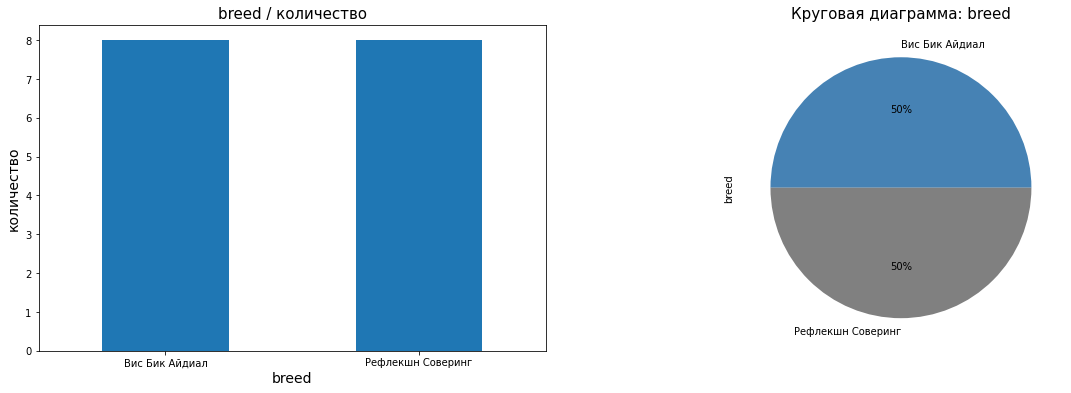

In [1137]:
graphs_cat (cows, 'breed')

«ЭкоФерма» предлагает коров двух пород: Вис Бик Айдиал, Рефлекшн Соверинг. Коров каждой породы одинаковое количество - по 8 коров. 

#### 'pasture_type' (тип пастбища)

In [1138]:
cows.groupby('pasture_type')['pasture_type'].count()

pasture_type
Равнинное    8
Холмистое    8
Name: pasture_type, dtype: int64

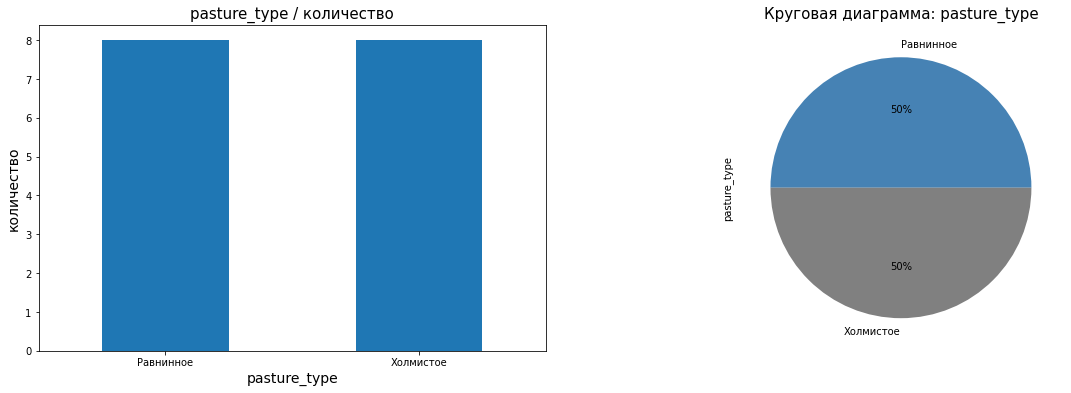

In [1139]:
graphs_cat (cows, 'pasture_type')

Тип пастбища - это ландшафт лугов, на которых паслась корова. Всего есть пастбища двух типов: равнинное и холмистое, на каждом из которых пасутся по 8 коров «ЭкоФермы».

#### 'dad_bull_breed' (порода папы-быка)

In [1140]:
cows.groupby('dad_bull_breed')['dad_bull_breed'].count()

dad_bull_breed
Айдиал      6
Соверин    10
Name: dad_bull_breed, dtype: int64

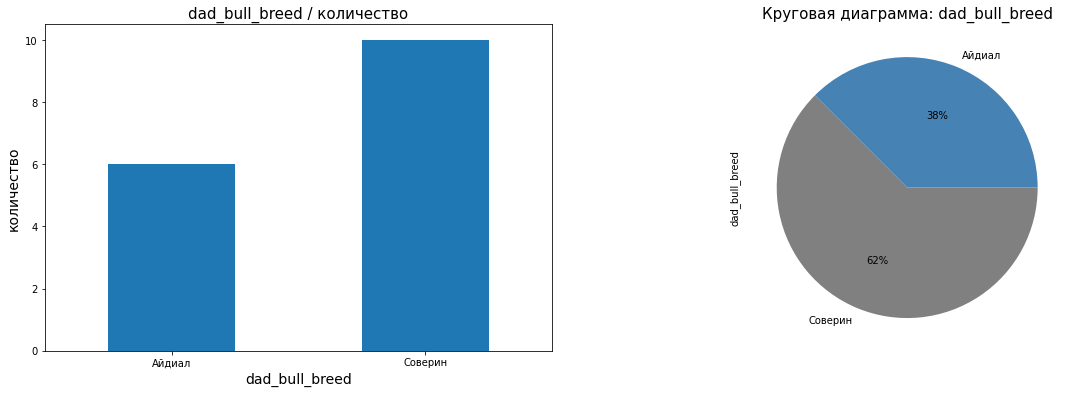

In [1141]:
graphs_cat (cows, 'dad_bull_breed')

У 10 коров «ЭкоФермы» (62 % от общего количества) папа породы Соверин, а у 6 коров (38 %) - папа породы Айдиал.

#### 'dad_name' (имя папы-быка)

In [1142]:
cows.groupby('dad_name')['dad_name'].count()

dad_name
Барин       2
Буйный      7
Геркулес    5
Соловчик    2
Name: dad_name, dtype: int64

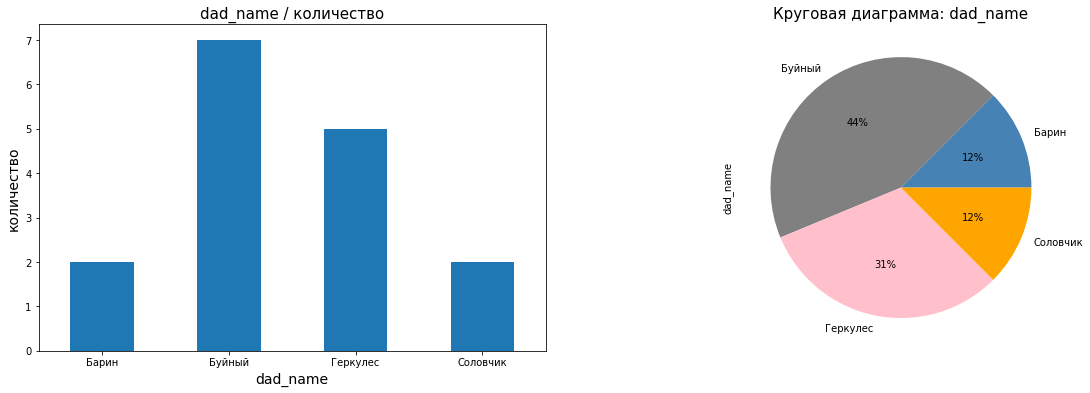

In [1143]:
graphs_cat (cows, 'dad_name')

На «ЭкоФерме» есть коровы-дочери от четырех разных быков-отцов. Больше всего коров-дочерей у быка Буйный (он папа 7 коров / 44 % всех коров «ЭкоФермы»), второе место у быка Геркулес (5 коров / 31 %) и по 2 коровы-дочери у быков Барин и Соловичик (по 12 %).

#### 'age' (возраст)

In [1144]:
cows.groupby('age')['age'].count()

age
более_2_лет    11
менее_2_лет     5
Name: age, dtype: int64

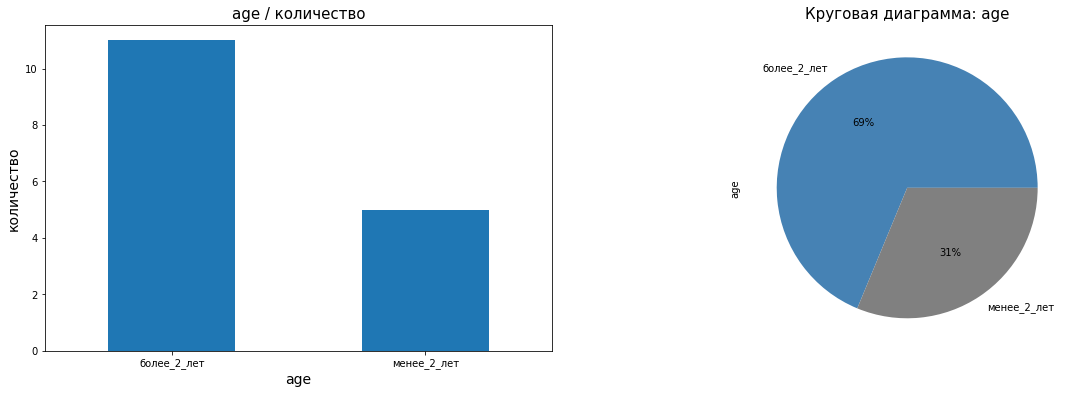

In [1145]:
graphs_cat (cows, 'age')

По возрастному критерию все коровы «ЭкоФермы» делятся на 2 категории: 'менее 2 лет', 'более 2 лет'. Заметим, что коров возраста 'более 2 лет' больше практически в 2 раза: 11 коров 'более 2 лет' (69 % от всех коров «ЭкоФермы») и только 5 коров 'менее 2 лет' (31 %).

### Вывод по результатам исследовательского анализа

На этом этапе был проведен анализ всех количественных и категориальных переменных датасетов herd, dad и cows, построены соответствующие графики.

**Датасет herd**

В столбце 'milk_yield_kg' (удой) был обнаружен выброс - значение 45616 // строка с выбросом удалена

В столбце 'fat_pct' были обнаружены выбросы - все значения параметра ниже 3.4. Количество таких строк довольно большое - 86 строк (13.69 % от всего датафрейма) и удаление всех таких строк может повлиять на результаты исследования // данные строки с выбросами удалять не будем.

В столбце 'protein_pct' были обнаружены выбросы - все значения ниже 3.070 и выше 3.0815. Всего таких строк 5 (0.8 % от всего датафрейма)  
// строки с выбросами удалены

В остальных столбцах выбросы или аномальные значения не обнаружены. 

---
Распределения всех количественных признаков за исключением 'fat_pct' в датафрейме herd близки к нормальному. 

Распределение признака 'fat_pct' (жирность) не похоже на нормальное. Можно предположить, что это связано со спецификой признака. Если есть возможность - желательно уточнить у фермера, каким образом производили измерения. Возможно, прибор, с помощью которого производили измерения, настроен таким образом, что показывает значения только до определенного максимального (выше определенного значения - информации нет).

Заметим, что распределение 'sugar_protein_ratio' похоже на нормальное ассиметричное, но в данных есть пропуски - можно предположить, что это связано со спецификой признака. Если есть возможность, желательно уточнить у фермера, как расчитывали данный показатель, а именно - каким образом измеряли количество сахара и протеина в корме коровы. Возможно, пропуски в данных связаны с прибором, с помощью которого производили измерения (возможно, причина в его настройках).

---
Был проведен анализ категориальных параметров датасета herd.

В стаде есть коровы двух пород: Вис Бик Айдиал (368 коров / 59 % стада) и Рефлекшн Соверинг (255 коров / 41 % стада).  
Коровы пасутся на пастбищах двух типов: равнинном и холмистом, при этом большинство коров пасутся на холмистом (348 коров / 56 % стада), остальные - на равнинном (275 коров / 44 % стада).  
У одной половины стада - папа породы Айдиал (314 коровы), у другой - породы Соверин (309 коров).  
По оценкам фермера вкусное молоко у 366 коров (59 % стада), невкусное - у 257 коров (41 % стада).  
В стаде ~ в 5 раз больше коров возраста 'более 2 лет' (514 коров / 83 % стада), чем коров в возрасте 'менее 2 лет' (109 коров / 17 % стада).

---
**Датасет dad**

Датасет dad состоит всего из двух столбцов - id (уникальный идентификатор коровы) и 'dad_name' (имя папы-быка). Количественных переменных нет, рассмотрели единственную категориальную переменную - 'dad_name'.

В стаде есть коровы-дочери от четырех разных отцов. Первое место по количеству дочерей в этом стаде занимает бык Барин (он папа 240 коров / 38 % стада), второе место - бык Буйный (215 коров / 34 %), третье место - бык Соловчик (110 коров / 17 %) и последнее место - Геркулес (всего 64 коровы / 10 %).

---
**Датасет cows**

Датасет cows состоит всего из 16 строк. Количественных переменных всего две: 'current_fat_pct' (текущая жирность, %) и 'current_protein_pct' (текущий уровень белка, %). 

Распределение признаков 'current_fat_pct' и 'current_protein_pct' не похоже на нормальное. Отметим, что в файле с данными, который предоставила «ЭкоФерма», содержание белков и жиров в молоке указано на момент продажи. Таким образом, в данные, которые были предоставлены для исследования, попали результаты только одного измерения, что объясняет такое распределение показателей.

Выбросы или аномальные значения признаков 'current_fat_pct' и 'current_protein_pct' не обнаружены.

---
Был проведен анализ категориальных параметров датасета cows.

«ЭкоФерма» предлагает коров двух пород: Вис Бик Айдиал (8 коров), Рефлекшн Соверинг(8 коров).  
Коровы пасутся на пастбищах двух типов: равнинном и холмистом (на каждом по 8 коров).  
У 10 коров «ЭкоФермы» (62 % всех коров) папа породы Соверин, а у 6 коров (38 %) - папа породы Айдиал.  
На «ЭкоФерме» есть коровы-дочери от четырех разных быков-отцов. Больше всего коров-дочерей у быка Буйный (он папа 7 коров / 44 % всех коров «ЭкоФермы»), второе место у быка Геркулес (5 коров / 31 %) и по 2 коровы-дочери у быков Барин и Соловичик (по 12 %).  
Коров возраста 'более 2 лет' в стаде больше практически в 2 раза: 11 коров 'более 2 лет' (69 % всех коров) и только 5 коров 'менее 2 лет' (31 %).

---
Итак, данные очищены от выбросов, кажутся реалистичными и готовы к дальнейшему использованию.

## Шаг 4. Корреляционный анализ признаков в датасете herd

### Взаимосвязь между признаками в датасете herd

На этом этапе построим матрицу корреляции между всеми признаками в датасете herd.

In [1146]:
herd_matrix = herd.drop('id', axis=1) # отбросим столбец 'id' для построения матрицы корелляции

In [1147]:
herd_matrix.corr()

milk_yield_kg  energy_feed_unit  raw_protein_g  \
milk_yield_kg             1.000000          0.764975       0.446709   
energy_feed_unit          0.764975          1.000000       0.386973   
raw_protein_g             0.446709          0.386973       1.000000   
sugar_protein_ratio       0.806833          0.750319       0.449478   
fat_pct                   0.602767          0.638708       0.361458   
protein_pct               0.002288         -0.014925       0.222169   

                     sugar_protein_ratio   fat_pct  protein_pct  
milk_yield_kg                   0.806833  0.602767     0.002288  
energy_feed_unit                0.750319  0.638708    -0.014925  
raw_protein_g                   0.449478  0.361458     0.222169  
sugar_protein_ratio             1.000000  0.626552     0.089748  
fat_pct                         0.626552  1.000000    -0.014117  
protein_pct                     0.089748 -0.014117     1.000000

Для лучшего восприятия визуализируем информацию - построим тепловую карту корреляционной матрицы.

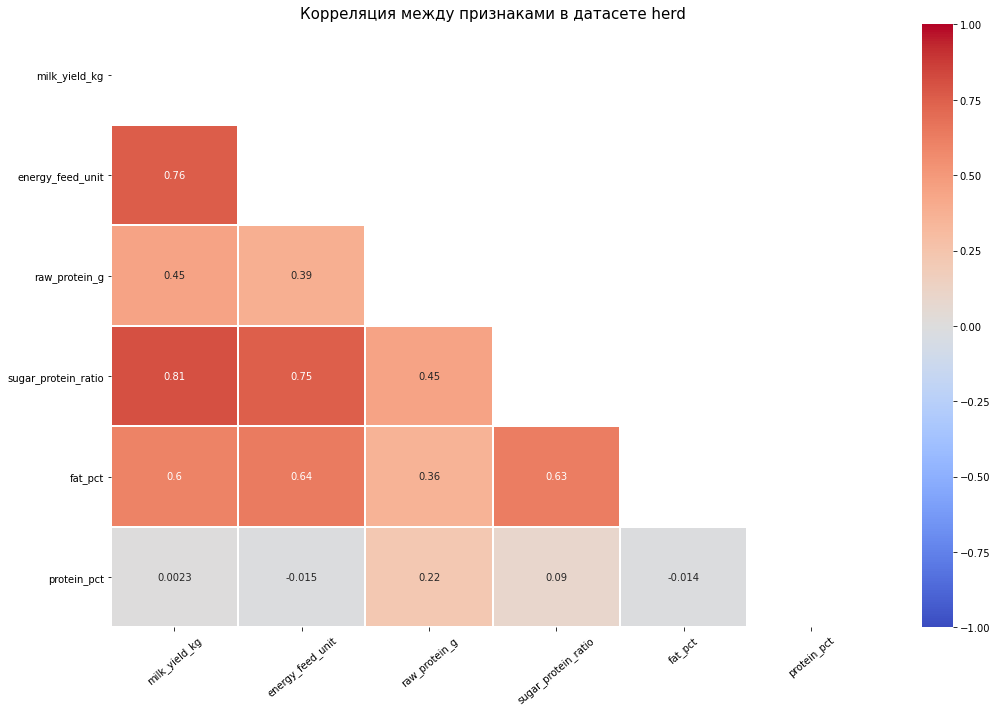

In [1148]:
f, ax = plt.subplots(figsize=(15, 10))

matrix = np.triu(herd_matrix.corr())
sns.heatmap(herd_matrix.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=1, linecolor='white', mask=matrix)
plt.title('Корреляция между признаками в датасете herd', fontsize=15)
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

### Диаграммы рассеяния для признака 'milk_yield_kg' и всех количественных признаков с учётом значения категориальных

In [1149]:
# cоздадим список количественных признаков 
quantitative = ['energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio', 'fat_pct', 'protein_pct']

>В целях оптимизации кода создадим функцию **build_graphs**:  

на входе функция принимает категориальный признак датасета herd (параметр cat_var)  
результат работы функции - диаграммы рассеяния для признака 'milk_yield_kg' и всех количественных признаков с учётом значения категориальных 

In [1150]:
def build_graphs (cat_var):
    
    plt.figure(figsize=(15, 15))
    
    for i, mark in enumerate(quantitative, 1):
        
        plt.subplot(3, 2, i)
        sns.scatterplot(data=herd, x=mark, y='milk_yield_kg', hue=cat_var, palette=['steelblue', 'red'])
        plt.title(f'milk_yield_kg / {mark}', fontsize=15)
     
    plt.tight_layout()
    plt.show()

* **Диаграмма рассеяния для признака 'milk_yield_kg' и всех количественных с учётом значения категориального 'breed'**

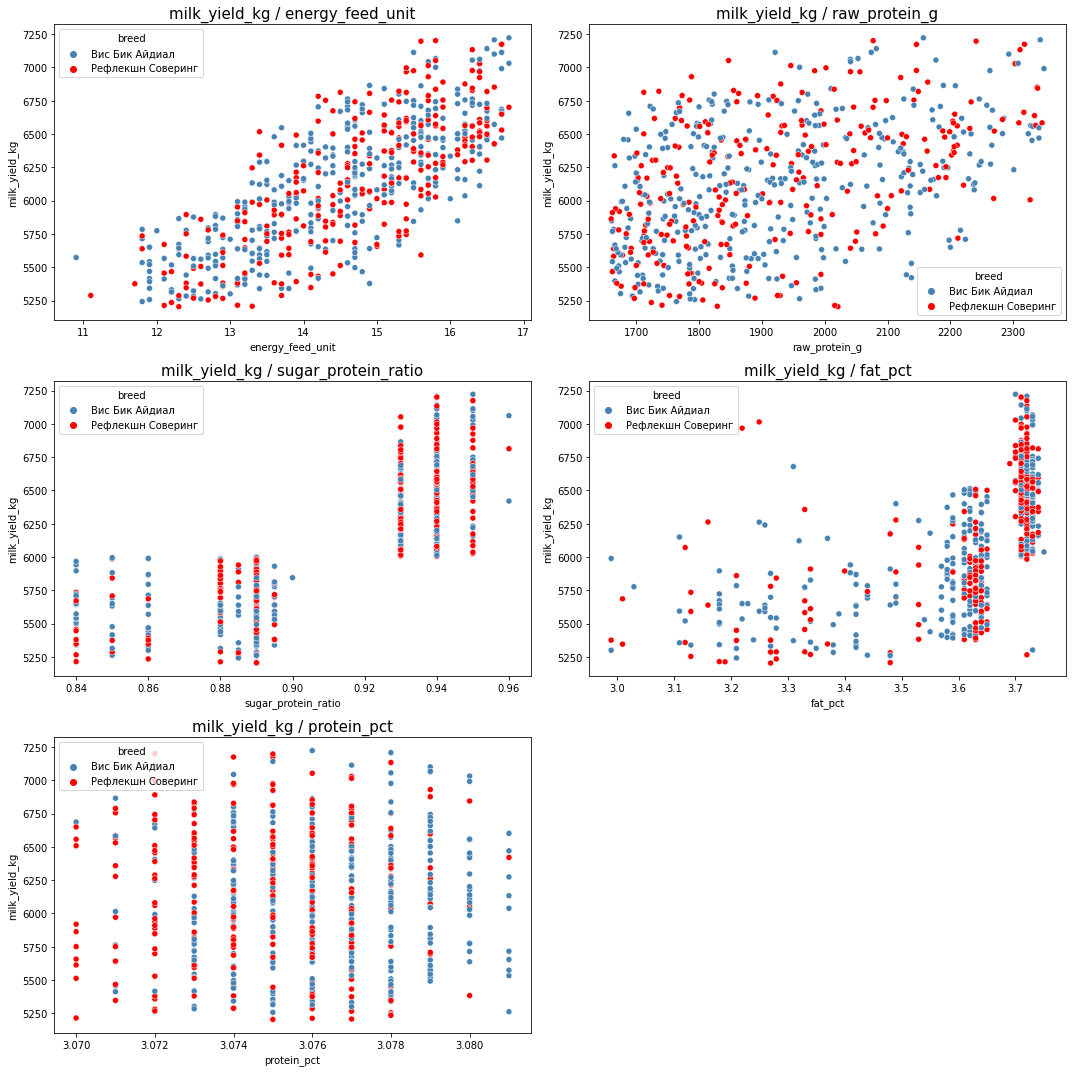

In [1151]:
build_graphs ('breed')

* **Диаграмма рассеяния для признака 'milk_yield_kg' и всех количественных с учётом значения категориального 'pasture_type'**

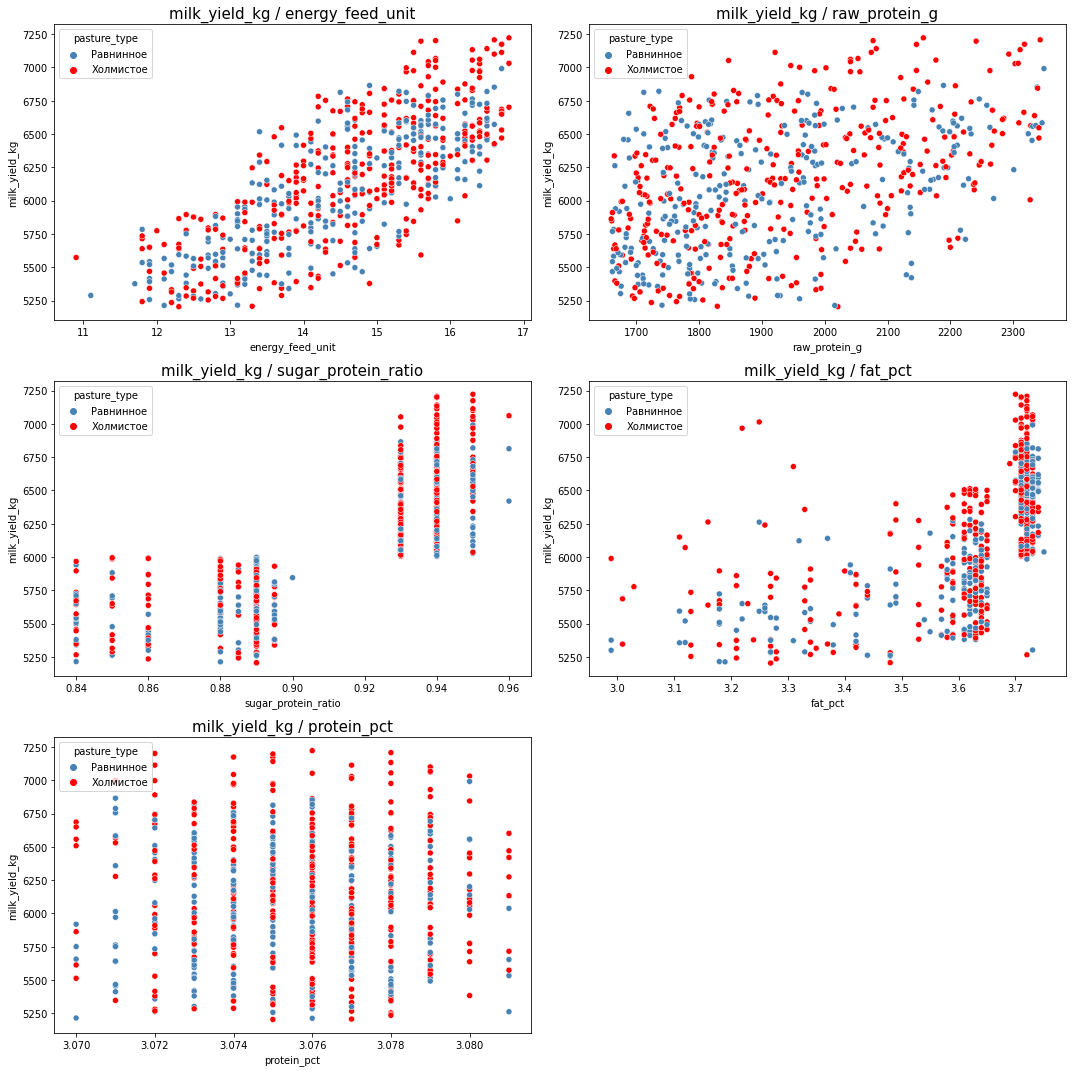

In [1152]:
build_graphs ('pasture_type')

* **Диаграмма рассеяния для признака 'milk_yield_kg' и всех количественных с учётом значения категориального 'dad_bull_breed'**

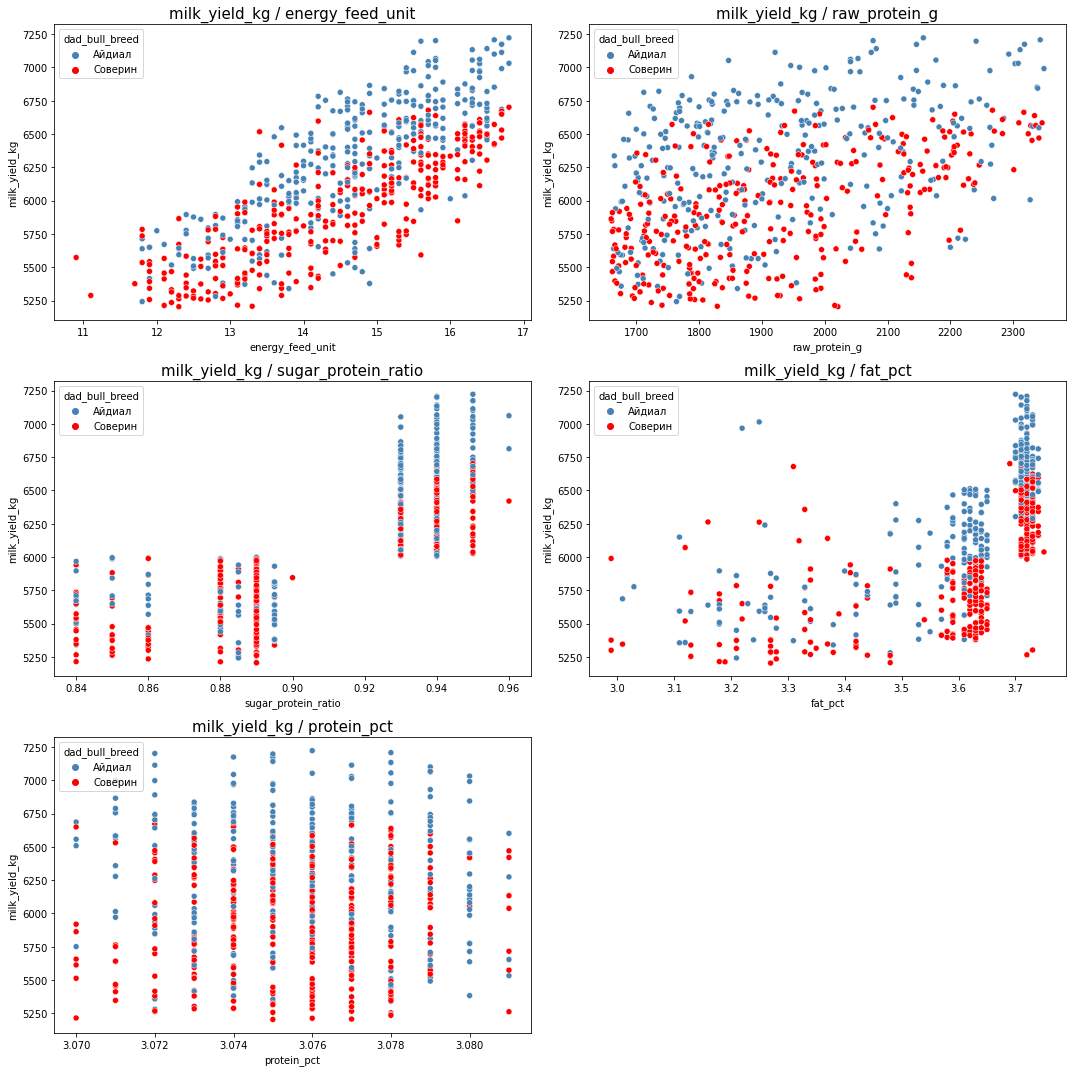

In [1153]:
build_graphs ('dad_bull_breed')

* **Диаграмма рассеяния для признака 'milk_yield_kg' и всех количественных с учётом значения категориального 'milk_taste'**

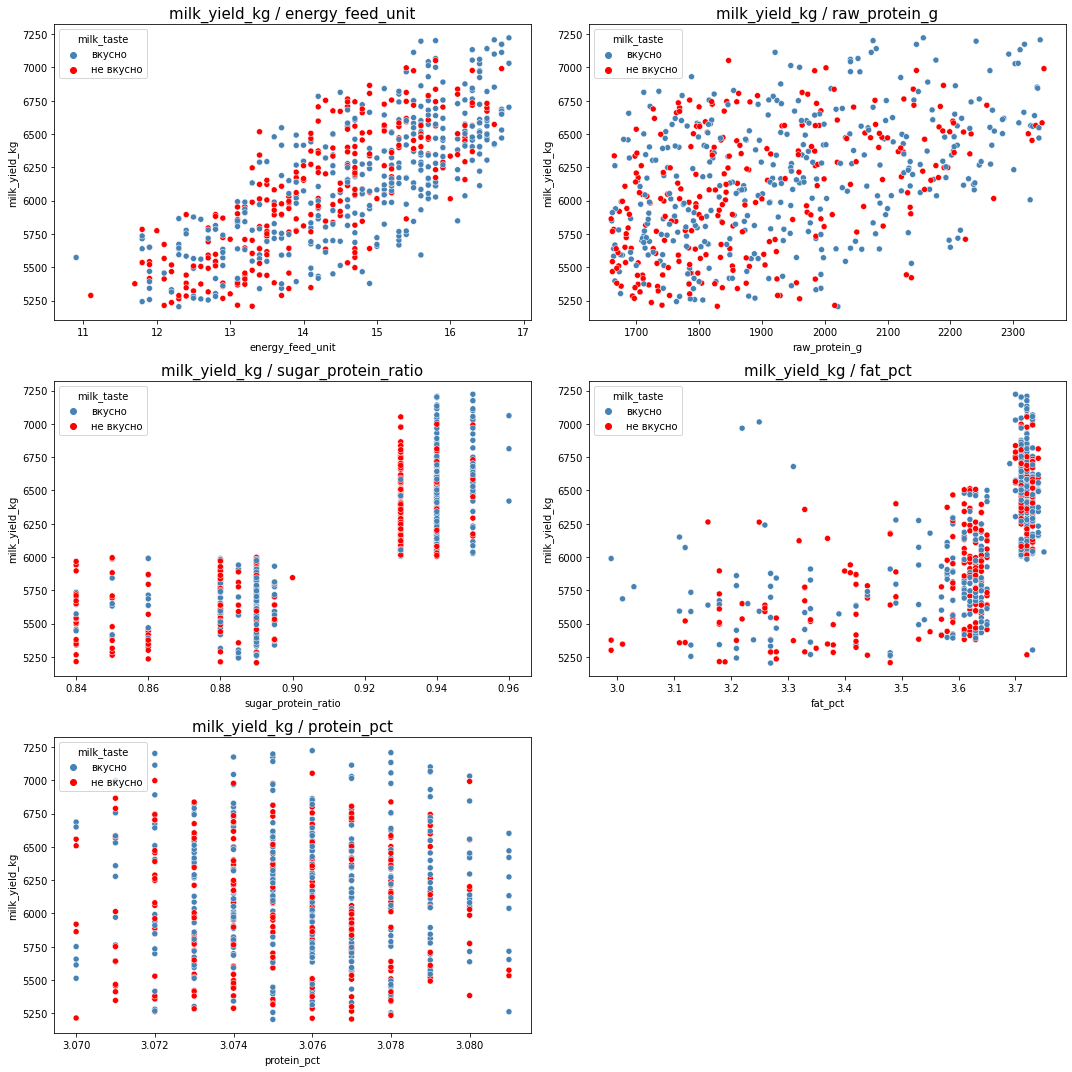

In [1154]:
build_graphs ('milk_taste')

* **Диаграмма рассеяния для признака 'milk_yield_kg' и всех количественных с учётом значения категориального 'age'**

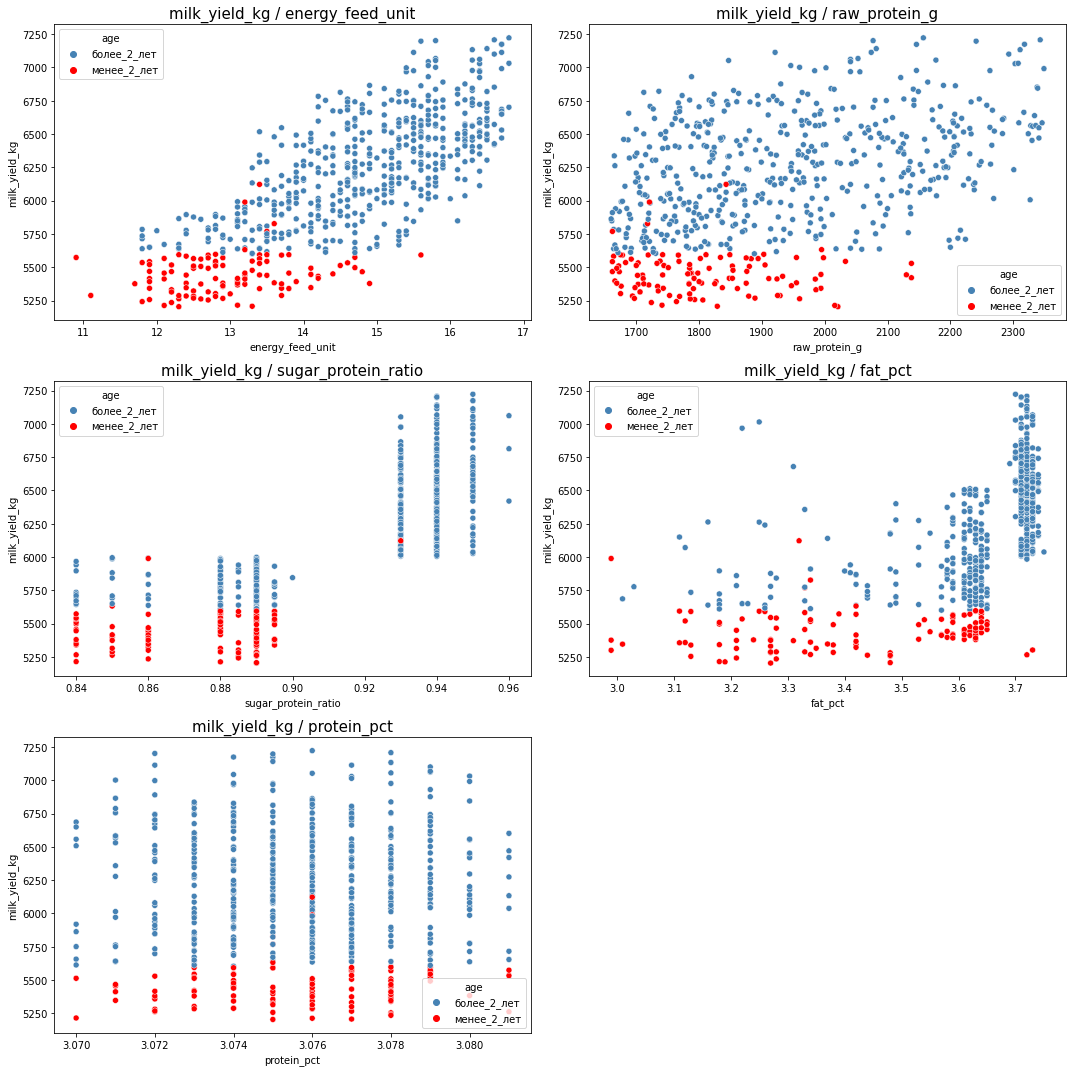

In [1155]:
build_graphs ('age')

### Выводы о взаимосвязи признаков

*Целевой* признак - удой ('milk_yield_kg'), *входные* - остальные количественные признаки: ЭКЕ ('energy_feed_unit'), сырой протеин ('raw_protein_g'), СПО ('sugar_protein_ratio'), процент жирности ('fat_pct') и процент содержания белка ('protein_pct'). 

Основываясь на построенные выше диаграммы рассеяния и рассчитанные коэффициенты корелляции, опишем взаимосвязь между целевым и входными признаками.

**1. Какой тип взаимосвязи между целевым и входными признаками?**

* **'milk_yield_kg' (удой) / 'energy_feed_unit' (ЭКЕ)**

Коэффициент корелляции 0.76 - сильная положительная взаимосвязь. С увеличением питательности корма (значение энергетической кормовой единицы увеличивается) увеличивается удой. 

Как мы видим на графиках распределения, данная корреляция справедлива для двух пород коров, для коров, пасущихся на разных типах пастбищ, для коров со вкусным и невкусным молоком. Можно заметить, что для коров с папой породы Соверин с ростом ЭКЕ удой растет чуть медленнее, чем для коров с папой породы Айдиал. Также заметим, что для коров возраста менее двух лет с увеличением ЭКЕ удой практически не изменяется (связь удоя и ЭКЕ для молодых коров практически отсутствует), а для коров возраста более двух лет видим сильную положительную корелляцию.

* **'milk_yield_kg' (удой) / 'raw_protein_g' (сырой протеин)**

Коэффициент корелляции 0.45 - средняя положительная связь.

Взаимосвязь между содержанием сырого протеина в корме и удоем выражена не так явно. На графике диаграмме рассеяния виден довольно большой разброс значений, однако наблюдается общий тренд на прямую пропорциональную зависимость. Отметим, что для коров возраста менее двух лет с увеличением показателя сырого протеина удой практически не изменяется (связь удоя и содержания сырого протеина в корме для молодых коров практически отсутствует), для коров возраста более двух лет видим умеренно положительную корелляцию.

* **'milk_yield_kg' (удой) / 'sugar_protein_ratio' (СПО)**

Коэффициент корелляции 0.81 - сильная положительная взаимосвязь.

Связь похожа на нелинейную, на графиках видим, что наблюдения сгруппированы в два кластера и есть явная точка перегиба, после которой функция начинает расти (значение 0.9). Для молодых коров (возраст менее двух лет) отношение сахара к протеину в корме коровы практически никак не влияет на удой (после значения значение 0.9 роста функции нет). Также заметим, что данные могут принимать только фиксированные значения, что обьясняет такой вид графика.

* **'milk_yield_kg' (удой) / 'fat_pct' (процент жирности молока)**

Коэффициент корелляции 0.6 - средняя положительная взаимосвязь.

Линейной связи нет. Для молодых коров (возраст менее двух лет) взаимосвязь процента жирности молока с удоем практически отсутствует. Также заметим, что в основном данные могут принимать только фиксированные значения, что обьясняет такой вид графика.

* **'milk_yield_kg' (удой) / 'protein_pct' (процент содержания белка в молоке)**

Коэффициент корелляции 0.0023 - очень слабая связь.
На графиках видим отсутствие линейной связи.
Также заметим, что данные могут принимать только фиксированные значения, что обьясняет такой вид графика.

**2. Есть ли нелинейные связи между целевым и входными признаками?**

Да, нелинейная связь между признаками:   
'milk_yield_kg' (удой) и 'energy_feed_unit' (ЭКЕ)   
'milk_yield_kg' (удой) / 'sugar_protein_ratio' (СПО)  
'milk_yield_kg' (удой) / 'fat_pct' (процент жирности молока)  
'milk_yield_kg' (удой) / 'protein_pct'

**3. Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?**

Для того, чтобы признаки были информативны для линейной регрессии, необходимо исключить нелинейность.

Признаки 'fat_pct' (жирность молока) и 'protein_pct' (процент содержания белков в молоке) при обучении модели линейной регрессии следует удалить, поскольку это характеристики молока и напрямую с целевым признаком они не связаны.

Чтобы устранить нелинейность связи между 'milk_yield_kg' (удой) / 'sugar_protein_ratio' (СПО), можно ввести новую категориальную переменную и преобразовать признак 'sugar_protein_ratio' в категориальный бинарный (это возможно так как, как мы уже отметили ранее, наблюдения сгруппированы в два кластера с границей 0.91).

Нелинейную связь между признаками 'milk_yield_kg' (удой) и 'energy_feed_unit' (ЭКЕ) можно исключить, если ввести новый признак 'energy_feed_unit' в квадрате.

**4. Наблюдается ли мультиколлинеарность между входными признаками?**

Между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой необходимо справляться.

## Шаг 5. Обучение модели линейной регрессии

>В целях оптимизации кода для построения графиков для анализа остатков (гистограмма распределения и диаграммы рассеяния) создадим функцию **graphs_residuals**:  

на входе функция принимает остатки (residuals), предсказанные значения (predictions) и количество корзин для построения графика распределения остатков (number_bins)  
результат работы функции - гистограмма распределения и диаграмма рассеяния остатков.

In [1156]:
def graphs_residuals (residuals, predictions, number_bins, model):
    
    plt.figure(figsize=(20, 6))
    plt.suptitle(f'Анализ остатков для модели {model}', fontsize=16)
    
    plt.subplot(1, 2, 1)
    plt.hist(residuals, edgecolor='blue', bins=number_bins) 
    plt.vlines(x=0, colors='black', ymin=0, ymax=11, linestyles='--', label='у=0')
    plt.vlines(x=residuals.median(), colors='red', ymin=0, ymax=11, label='медиана')
    plt.vlines(x=residuals.mean(), colors='orange', ymin=0, ymax=11, label='среднее')
    plt.legend()
    plt.title(f'Распределение остатков для модели {model}', fontsize=15)
    plt.ylabel('плотность распределения', fontsize=14)
    plt.xlabel('остатки', fontsize=14)

    plt.subplot(1, 2, 2)
    plt.scatter(predictions, residuals, alpha=0.4)
    plt.title(f'Анализ дисперсии остатков для модели {model}', fontsize=15)
    plt.ylabel('остатки', fontsize=14)
    plt.xlabel('предсказания модели', fontsize=14)
    plt.show()

>В целях оптимизации кода для расчета метрик создадим функцию **quality_control**:  

на входе функция принимает целевой признак на тестовую выборку (y_true) и предсказания (y_pred)  
результат работы функции - рассчитанные значения метрик MSE, MAE, RMSE

In [1157]:
def quality_control (y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred) #среднеквадратичная ошибка
    rmse = mean_squared_error(y_true, y_pred, squared=False) # корень среднеквадратичной ошибки
    mae = mean_absolute_error(y_true, y_pred) # средняя абсолютная ошибка
    print(f'Cреднеквадратичная ошибка MSE = {round(mse, 2)}')
    print(f'Корень среднеквадратичной ошибки RMSE = {round(rmse, 2)}')
    print(f'Cредняя абсолютная ошибка MAE = {round(mae, 2)}')

### Модель 1 - обучение линейной регрессии

Подготовим данные датасета herd и обучим на них первую модель LinearRegression.  
В качестве целевого будем использовать признак 'milk_yield_kg' (удой).

Для модели линейной регрессии не подходят признаки 'fat_pct' (жирность молока), 'protein_pct' (процент содержания белков в молоке) и 'milk_taste' (вкус молока) так как это характеристики молока и напрямую с целевым признаком они не связаны.  Также, как мы выяснили ранее при проведении корелляционного анализа, между 'milk_yield_kg' (удой) / 'protein_pct' (процент содержания белка в молоке) связь практически отсутствует (коэффициент корелляции 0.0023). Признак 'id' для обучения модели тоже не нужен.

Таким образом, из датасета herd необходимо удалить столбцы 'id', 'fat_pct', 'protein_pct', 'milk_taste'.

In [1158]:
# удалим столбцы, которые не подходят для модели линейной регрессии
herd_model_1 = herd.drop(['id', 'fat_pct', 'protein_pct', 'milk_taste'], axis=1)
herd_model_1.head()

milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
0           5863              14.2           1743                0.890   
1           5529              12.8           2138                0.890   
2           5810              14.0           1854                0.885   
3           5895              12.4           2012                0.885   
4           5302              12.8           1675                0.885   

               breed pasture_type dad_bull_breed          age  
0     Вис Бик Айдиал    Равнинное         Айдиал  более_2_лет  
1     Вис Бик Айдиал    Равнинное        Соверин  менее_2_лет  
2  Рефлекшн Соверинг    Холмистое        Соверин  более_2_лет  
3  Рефлекшн Соверинг    Холмистое         Айдиал  более_2_лет  
4     Вис Бик Айдиал    Равнинное        Соверин  менее_2_лет

In [1159]:
# создадим константу RANDOM_STATE
RANDOM_STATE = 42

In [1160]:
# сохраним входные и целевой признаки
X = herd_model_1.drop('milk_yield_kg', axis=1)
y = herd_model_1['milk_yield_kg']

# разделим входные и целевой признаки на тренировочную и валидационную выборки 
X_train, X_valid, y_train, y_valid = train_test_split(
    X, 
    y,
    random_state=RANDOM_STATE
) 

In [1161]:
# разделим признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'dad_bull_breed', 'age']
num_col_names = ['energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio']

In [1162]:
# кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [1163]:
# масштабируем количественные признаки с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names]) 

In [1164]:
# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [1165]:
# обучим модель линейной регрессии на подготовленных данных
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)

# получаем предсказания
predictions_1 = model_lr_1.predict(X_valid)

Оценим качество модели на тестовой выборке: рассчитаем R², проанализируем остатки с помощью графиков.  
Остатки модели (ошибки) - это разница между истинными и предсказанными значениями.

In [1166]:
# рассчитаем значения R² для линейной регрессии
r2_1 = r2_score(y_valid, predictions_1)
print(f'Коэффициент детерминации R² = {r2_1} (округлим до {round(r2_1, 2)})')

Коэффициент детерминации R² = 0.7832029531509055 (округлим до 0.78)


In [1167]:
# вычислим остатки
residuals_1 = y_valid - predictions_1

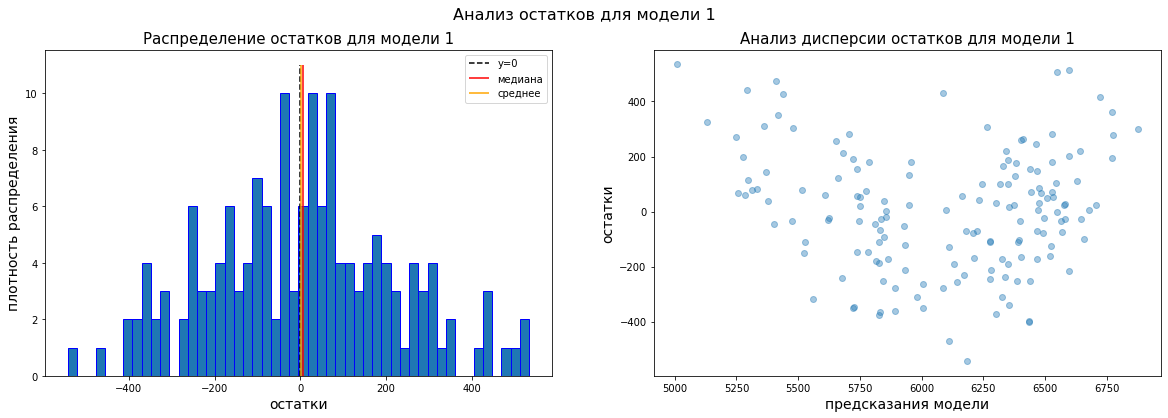

In [1168]:
# построим графики для анализа остатков
graphs_residuals (residuals_1, predictions_1, 50, 1)

---
**Вывод:**

* Для первой модели *коэффициент детерминации R²* = 0.78


* *Случайность остатков модели* 

Распределение остатков - нормальное.  
В качестве меры центральной тенденции будем рассматривать среднее, т.к. среднее лучше учитывает все данные и в данных нет большого количества выбросов. Заметим, что график распределения остатков симметричен относительно среднего. Среднее и медианные значения остатков модели равны нулю (совпадают с осью у = 0).

* *Устойчивость остатков модели*

В целом, остатки имеют постоянную дисперсию на оси у на протяжении всей оси х. Разница между минимумом и максимумом остатков при любых прогнозных значениях модели не меняется, что говорит о высоком качестве модели, поскольку она равномерно ошибается. 

**Условия случайности и устойчивости остатков соблюдены - это означает что в целом модель справляется с задачей.**

### Модель 2 - обучение линейной регрессии

Далее подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель LinearRegression.

Как мы уже заметили ранее на диаграммах рассеяния, некоторые входные признаки связаны с целевым нелинейно. Для того, чтобы эти признаки были информативны для линейной регрессии, исключим нелинейность.

* Заметим, что признаки 'milk_yield_kg' (удой) и 'sugar_protein_ratio' (СПО) связаны нелинейно. На диаграмме рассеяния видно, что наблюдения сгруппированы в два кластера, причём значение 'sugar_protein_ratio', равное 0.91, можно считать границей между ними. Для того, чтобы устранить нелинейность, количественный признак 'sugar_protein_ratio' преобразуем в категориальный бинарный, использовав эту границу.


* Также можно заметить, нелинейную связь между признаками 'milk_yield_kg' (удой) и 'energy_feed_unit' (ЭКЕ). Нелинейность между ними можно исключить, если ввести новый признак 'energy_feed_unit' в квадрате.

In [1169]:
# создадим копию датасета
herd_model_2 = herd.copy(deep=True)

In [1170]:
# преобразуем 'sugar_protein_ratio' (СПО) в новый категориальный признак 'sugar_protein_ratio_cat'
herd_model_2['sugar_protein_ratio_cat'] = herd_model_2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
herd_model_2['sugar_protein_ratio_cat'].value_counts()

1    369
0    254
Name: sugar_protein_ratio_cat, dtype: int64

In [1171]:
# преобразуем признак 'energy_feed_unit' (ЭКЕ) в новый признак 'energy_feed_unit_2'
herd_model_2['energy_feed_unit_2'] = herd_model_2['energy_feed_unit'] ** 2
herd_model_2.head()

id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
0   1           5863              14.2           1743                0.890   
1   2           5529              12.8           2138                0.890   
2   3           5810              14.0           1854                0.885   
3   4           5895              12.4           2012                0.885   
4   5           5302              12.8           1675                0.885   

               breed pasture_type dad_bull_breed  fat_pct  protein_pct  \
0     Вис Бик Айдиал    Равнинное         Айдиал     3.58        3.076   
1     Вис Бик Айдиал    Равнинное        Соверин     3.54        3.079   
2  Рефлекшн Соверинг    Холмистое        Соверин     3.59        3.074   
3  Рефлекшн Соверинг    Холмистое         Айдиал     3.40        3.075   
4     Вис Бик Айдиал    Равнинное        Соверин     3.73        3.073   

  milk_taste          age  sugar_protein_ratio_cat  energy_feed_unit_2  
0     вкусно  более_2_лет                        0              201.64  
1     вкусно  менее_2_лет                        0              163.84  
2  не вкусно  более_2_лет                        0              196.00  
3  не вкусно  более_2_лет                        0              153.76  
4     вкусно  менее_2_лет                        0              163.84

In [1172]:
# убираем "лишние" столбцы
herd_model_2 = \
herd_model_2.drop(['id', 'fat_pct', 'protein_pct', 'milk_taste', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)
herd_model_2.head()

milk_yield_kg  raw_protein_g              breed pasture_type  \
0           5863           1743     Вис Бик Айдиал    Равнинное   
1           5529           2138     Вис Бик Айдиал    Равнинное   
2           5810           1854  Рефлекшн Соверинг    Холмистое   
3           5895           2012  Рефлекшн Соверинг    Холмистое   
4           5302           1675     Вис Бик Айдиал    Равнинное   

  dad_bull_breed          age  sugar_protein_ratio_cat  energy_feed_unit_2  
0         Айдиал  более_2_лет                        0              201.64  
1        Соверин  менее_2_лет                        0              163.84  
2        Соверин  более_2_лет                        0              196.00  
3         Айдиал  более_2_лет                        0              153.76  
4        Соверин  менее_2_лет                        0              163.84

Таким образом, нелинейность мы исключили нелинейность, сейчас все признаки должны быть информативны для линейной регрессии.  
Далее создадим вторую модель: подготовим данные, обучим модель и оценим её качество.

In [1173]:
# сохраним входные и целевой признаки
X = herd_model_2.drop('milk_yield_kg', axis=1)
y = herd_model_2['milk_yield_kg']

# разделим входные и целевой признаки на тренировочную и валидационную выборки 
X_train, X_valid, y_train, y_valid = train_test_split(
    X, 
    y,
    #test_size=0.25,
    random_state=RANDOM_STATE
) 

In [1174]:
# разделим признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'dad_bull_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['raw_protein_g', 'energy_feed_unit_2']

In [1175]:
# кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [1176]:
# масштабируем количественные признаки с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names]) 

In [1177]:
# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [1178]:
# обучим модель линейной регрессии на подготовленных данных
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)

# получаем предсказания
predictions_2 = model_lr_2.predict(X_valid)

Оценим качество модели на тестовой выборке: рассчитаем R², проанализируем остатки с помощью графиков.

In [1179]:
# рассчитаем значения R² для линейной регрессии
r2_2 = r2_score(y_valid, predictions_2)
print(f'Коэффициент детерминации R² = {r2_2} (округлим до {round(r2_2, 2)})')

Коэффициент детерминации R² = 0.8347436421181884 (округлим до 0.83)


In [1180]:
# вычислим остатки
residuals_2 = y_valid - predictions_2

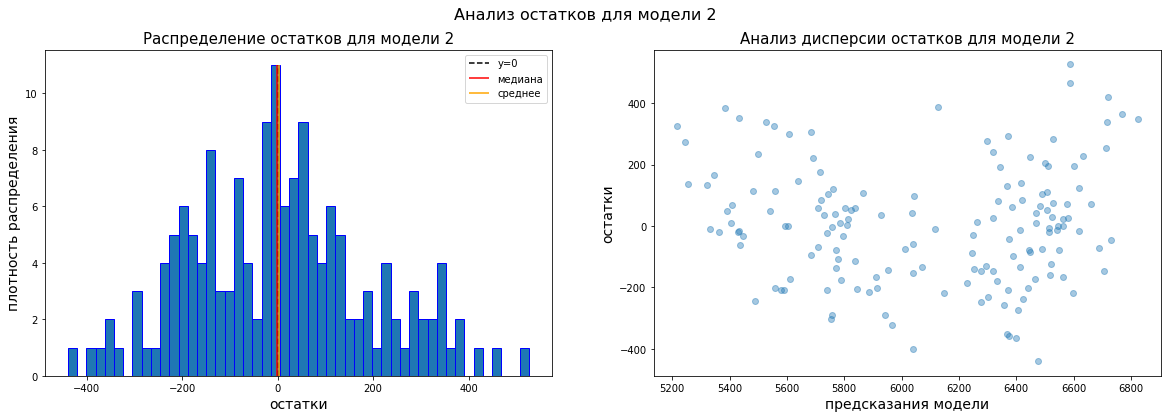

In [1181]:
# построим графики для анализа остатков
graphs_residuals (residuals_2, predictions_2, 50, 2)

---
**Вывод:**

* Для второй модели *коэффициент детерминации* R² = 0.83  
(по сравнению с первой моделью значение увеличилось / для первой модели R² = 0.78)


* *Случайность остатков модели*

Распределение остатков - нормальное.  
В качестве меры центральной тенденции будем рассматривать среднее, т.к. среднее лучше учитывает все данные и в данных нет большого количества выбросов. Заметим, что график распределения остатков симметричен относительно среднего. Среднее и медианные значения остатков модели равны нулю (совпадают с осью у = 0).

* *Устойчивость остатков модели*

В целом, остатки имеют постоянную дисперсию на оси у на протяжении всей оси х. Разница между минимумом и максимумом остатков при любых прогнозных значениях модели не меняется, что говорит о высоком качестве модели, поскольку она равномерно ошибается.

**Условия случайности и устойчивости остатков соблюдены - это означает что в целом модель справляется с задачей.**

### Модель 3 - обучение линейной регрессии

Добавим в данные датасета herd новый признак 'dad_name' (имя папы-быка) по ключу из датасета dad. Затем устраним нелинейность между признаками и создадим третью модель: подготовим данные, обучим модель и оценим её качество.

In [1182]:
# добавим в данные herd признак 'dad_name' из датасета dad
herd_model_3 = herd.merge(dad, on='id')
herd_model_3.head()

id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
0   1           5863              14.2           1743                0.890   
1   2           5529              12.8           2138                0.890   
2   3           5810              14.0           1854                0.885   
3   4           5895              12.4           2012                0.885   
4   5           5302              12.8           1675                0.885   

               breed pasture_type dad_bull_breed  fat_pct  protein_pct  \
0     Вис Бик Айдиал    Равнинное         Айдиал     3.58        3.076   
1     Вис Бик Айдиал    Равнинное        Соверин     3.54        3.079   
2  Рефлекшн Соверинг    Холмистое        Соверин     3.59        3.074   
3  Рефлекшн Соверинг    Холмистое         Айдиал     3.40        3.075   
4     Вис Бик Айдиал    Равнинное        Соверин     3.73        3.073   

  milk_taste          age  dad_name  
0     вкусно  более_2_лет    Буйный  
1     вкусно  менее_2_лет  Соловчик  
2  не вкусно  более_2_лет     Барин  
3  не вкусно  более_2_лет    Буйный  
4     вкусно  менее_2_лет     Барин

In [1183]:
# преобразуем 'sugar_protein_ratio' (СПО) в новый категориальный признак 'sugar_protein_ratio_cat'
herd_model_3['sugar_protein_ratio_cat'] = herd_model_3['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
herd_model_3['sugar_protein_ratio_cat'].value_counts()

1    369
0    254
Name: sugar_protein_ratio_cat, dtype: int64

In [1184]:
# преобразуем признак 'energy_feed_unit' (ЭКЕ) в новый признак 'energy_feed_unit_2'
herd_model_3['energy_feed_unit_2'] = herd_model_3['energy_feed_unit'] ** 2

In [1185]:
# убираем "лишние" столбцы
herd_model_3 = \
herd_model_3.drop(['id', 'fat_pct', 'protein_pct', 'milk_taste', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)
herd_model_3.head()

milk_yield_kg  raw_protein_g              breed pasture_type  \
0           5863           1743     Вис Бик Айдиал    Равнинное   
1           5529           2138     Вис Бик Айдиал    Равнинное   
2           5810           1854  Рефлекшн Соверинг    Холмистое   
3           5895           2012  Рефлекшн Соверинг    Холмистое   
4           5302           1675     Вис Бик Айдиал    Равнинное   

  dad_bull_breed          age  dad_name  sugar_protein_ratio_cat  \
0         Айдиал  более_2_лет    Буйный                        0   
1        Соверин  менее_2_лет  Соловчик                        0   
2        Соверин  более_2_лет     Барин                        0   
3         Айдиал  более_2_лет    Буйный                        0   
4        Соверин  менее_2_лет     Барин                        0   

   energy_feed_unit_2  
0              201.64  
1              163.84  
2              196.00  
3              153.76  
4              163.84

In [1186]:
# сохраним входные и целевой признаки
X = herd_model_3.drop('milk_yield_kg', axis=1)
y = herd_model_3['milk_yield_kg']

# разделим входные и целевой признаки на тренировочную и валидационную выборки 
X_train, X_valid, y_train, y_valid = train_test_split(
    X, 
    y,
    #test_size=0.25,
    random_state=RANDOM_STATE
) 

Объединим тренировочную и валидационную выборки - в дальнейшем это потребуется для того, чтобы заново кодировать и масштабировать уже полную тренировочную выборку.

In [1187]:
# объединим тренировочную и валидационную выборки
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

In [1188]:
# разделим признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'dad_bull_breed', 'age', 'dad_name', 'sugar_protein_ratio_cat']
num_col_names = ['energy_feed_unit_2', 'raw_protein_g']

In [1189]:
# кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [1190]:
# масштабируем количественные признаки с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names]) 

In [1191]:
# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [1192]:
# обучим модель линейной регрессии на подготовленных данных
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)

# получаем предсказания
predictions_3 = model_lr_3.predict(X_valid)

Оценим качество модели на тестовой выборке: рассчитаем R², проанализируем остатки с помощью графиков.

In [1193]:
# рассчитаем значения R² для линейной регрессии
r2_3 = r2_score(y_valid, predictions_3)
print(f'Коэффициент детерминации R² = {r2_3} (округлим до {round(r2_3, 2)})')

Коэффициент детерминации R² = 0.8413986635664519 (округлим до 0.84)


In [1194]:
# вычислим остатки
residuals_3 = y_valid - predictions_3

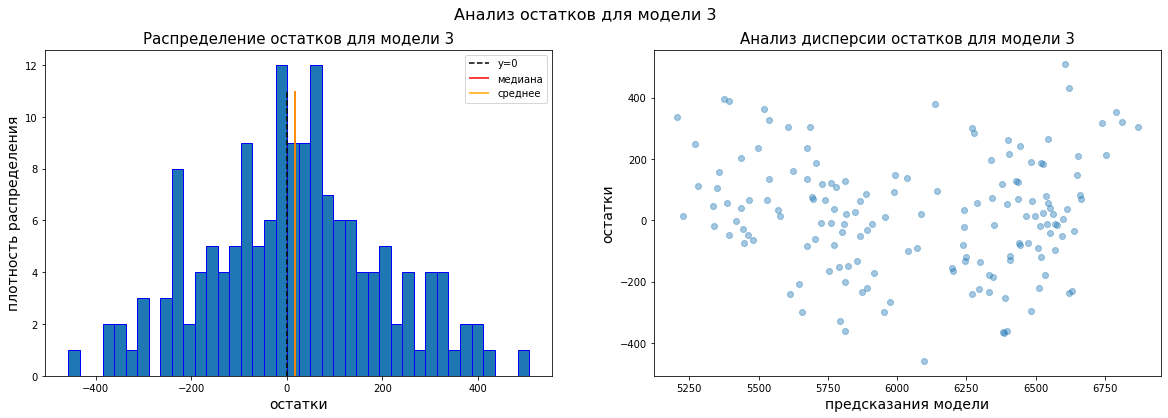

In [1195]:
# построим графики для анализа остатков
graphs_residuals (residuals_3, predictions_3, 40, 3)

---
**Вывод:**

* Для третьей модели *коэффициент детерминации* R² = 0.84  
(по сравнению со второй моделью значение увеличилось / для второй модели R² = 0.83)


* *Случайность остатков модели*

Распределение остатков - нормальное.  
В качестве меры центральной тенденции будем рассматривать среднее, т.к. среднее лучше учитывает все данные и в данных нет большого количества выбросов. Заметим, что график распределения остатков симметричен относительно среднего. Среднее и медианное значения совпадают и их смещение от у = 0 минимально.

* *Устойчивость остатков модели*

В целом, остатки имеют постоянную дисперсию на оси у на протяжении всей оси х. Разница между минимумом и максимумом остатков при любых прогнозных значениях модели не меняется, что говорит о высоком качестве модели, поскольку она равномерно ошибается.

**Условия случайности и устойчивости остатков соблюдены - это означает что в целом модель справляется с задачей.**

### Сравнение качества трёх моделей линейной регрессии (R², остатки)

In [1196]:
print(f'R² для первой модели = {round(r2_1, 2)}')
print(f'R² для второй модели = {round(r2_2, 2)}')
print(f'R² для третьей модели = {round(r2_3, 2)}')
print('----------')
print(f'Среднее значение остатков первой модели = {round(residuals_1.mean(), 2)}')
print(f'Среднее значение остатков второй модели = {round(residuals_2.mean(), 2)}')
print(f'Среднее значение остатков третьей модели = {round(residuals_3.mean(), 2)}')

R² для первой модели = 0.78
R² для второй модели = 0.83
R² для третьей модели = 0.84
----------
Среднее значение остатков первой модели = 1.66
Среднее значение остатков второй модели = 3.74
Среднее значение остатков третьей модели = 16.98


---
Итак, на данном этапе сравнения качества моделей можно отметить следующее: 
* самый высокий коэффициент детерминации R² у *третьей модели*
* минимальное среднее значение остатков у *первой модели*

### Оценка качества каждой модели (по трём метрикам: MSE, MAE, RMSE)

* Первая модель

In [1197]:
quality_control (y_valid, predictions_1)

Cреднеквадратичная ошибка MSE = 47500.0
Корень среднеквадратичной ошибки RMSE = 217.94
Cредняя абсолютная ошибка MAE = 173.8


* Вторая модель

In [1198]:
quality_control (y_valid, predictions_2)

Cреднеквадратичная ошибка MSE = 36207.49
Корень среднеквадратичной ошибки RMSE = 190.28
Cредняя абсолютная ошибка MAE = 149.72


* Третья модель

In [1199]:
quality_control (y_valid, predictions_3)

Cреднеквадратичная ошибка MSE = 34749.38
Корень среднеквадратичной ошибки RMSE = 186.41
Cредняя абсолютная ошибка MAE = 146.72


---
Заметим, что все три метрики (MSE, RMSE, MAE) имеют наименьшие значения *у третьей модели*.

---
Итак, мы провели оценку качества трёх моделей линейной регрессии метрикам R², MSE, RMSE, MAE и остаткам.  
В результате сравнения было выявлено, что *лучшая модель - третья*.

Далее укажем **доверительный интервал прогноза третьей модели**.  
Для этого рассчитаем квантили ошибки модели на тренировочных данных:

In [1200]:
# посчитаем 95% доверительный интервал третьей модели 
#print('95% доверительный интервал =',
#      st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

In [1201]:
print('Байесовский доверительный интервал = (',\
      np.quantile(predictions_3, 0.025).round(2),',', np.quantile(predictions_3, 0.975).round(2),')')

Байесовский доверительный интервал = ( 5327.63 , 6741.08 )


### Прогноз показателя 'milk_yield_kg' (удой)

С помощью лучшей модели (третьей) спрогнозируем удой коров, которых фермер хочет купить. Данные о коровах «ЭкоФермы» содержатся в датасете cows.

Добавим недостающие признаки: 'energy_feed_unit' (ЭКЕ), 'raw_protein_g' (cырой протеин) и 'sugar_protein_ratio' (СПО).

Как известно из информации из описания проекта, технологи заказчика пересмотрели подход к кормлению - для новых коров планируется увеличить значения каждого из этих параметров на 5%. Таким образом, возьмем из датасета herd средние значения каждого из признаков и увеличим их на 5%.

Затем выполним подготовку данных и получим прогноз показателя 'milk_yield_kg' (удой).

In [1202]:
# создадим копию датасета
cows_1 = cows.copy(deep=True)
missing = ['energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio'] # выделим недостающие признаки

In [1203]:
# посчитаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = herd[missing].mean()
new_values = mean_values * 1.05
new_values

energy_feed_unit         15.276742
raw_protein_g          2019.771910
sugar_protein_ratio       0.958947
dtype: float64

In [1204]:
# добавим недостающие признаки в датасет cows_new
# + сразу добавим новые столбцы 'energy_feed_unit_2' и 'sugar_protein_ratio_cat'
cows_1['energy_feed_unit'] = new_values['energy_feed_unit']
cows_1['energy_feed_unit_2'] = cows_1['energy_feed_unit'] ** 2
cows_1['raw_protein_g'] = new_values['raw_protein_g']
cows_1['sugar_protein_ratio'] = new_values['sugar_protein_ratio']
cows_1['sugar_protein_ratio_cat'] = cows_1['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
cows_1.head()

breed pasture_type dad_bull_breed  dad_name  current_fat_pct  \
0     Вис Бик Айдиал    Холмистое         Айдиал  Геркулес             3.58   
1     Вис Бик Айдиал    Равнинное        Соверин    Буйный             3.54   
2  Рефлекшн Соверинг    Равнинное        Соверин     Барин             3.59   
3  Рефлекшн Соверинг    Холмистое         Айдиал    Буйный             3.40   
4  Рефлекшн Соверинг    Равнинное         Айдиал    Буйный             3.64   

   current_protein_pct          age  energy_feed_unit  energy_feed_unit_2  \
0                3.076  более_2_лет         15.276742          233.378833   
1                3.081  менее_2_лет         15.276742          233.378833   
2                3.074  более_2_лет         15.276742          233.378833   
3                3.061  более_2_лет         15.276742          233.378833   
4                3.074  более_2_лет         15.276742          233.378833   

   raw_protein_g  sugar_protein_ratio  sugar_protein_ratio_cat  
0     2019.77191             0.958947                        1  
1     2019.77191             0.958947                        1  
2     2019.77191             0.958947                        1  
3     2019.77191             0.958947                        1  
4     2019.77191             0.958947                        1

In [1205]:
# удалим "лишние" столбцы
cows_1 = cows_1.drop(['current_protein_pct', 'current_fat_pct', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)

In [1206]:
# проведем проверку
display(cows_1.shape)
display(X_train_full.shape)
display(cows_1.head())
display(X_train_full.head())

(16, 8)

(623, 8)

breed pasture_type dad_bull_breed  dad_name          age  \
0     Вис Бик Айдиал    Холмистое         Айдиал  Геркулес  более_2_лет   
1     Вис Бик Айдиал    Равнинное        Соверин    Буйный  менее_2_лет   
2  Рефлекшн Соверинг    Равнинное        Соверин     Барин  более_2_лет   
3  Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  более_2_лет   
4  Рефлекшн Соверинг    Равнинное         Айдиал    Буйный  более_2_лет   

   energy_feed_unit_2  raw_protein_g  sugar_protein_ratio_cat  
0          233.378833     2019.77191                        1  
1          233.378833     2019.77191                        1  
2          233.378833     2019.77191                        1  
3          233.378833     2019.77191                        1  
4          233.378833     2019.77191                        1

raw_protein_g              breed pasture_type dad_bull_breed          age  \
0           1966     Вис Бик Айдиал    Равнинное        Соверин  более_2_лет   
1           1894     Вис Бик Айдиал    Равнинное         Айдиал  более_2_лет   
2           1977     Вис Бик Айдиал    Равнинное         Айдиал  более_2_лет   
3           1775  Рефлекшн Соверинг    Равнинное         Айдиал  более_2_лет   
4           1671     Вис Бик Айдиал    Равнинное         Айдиал  более_2_лет   

   dad_name  sugar_protein_ratio_cat  energy_feed_unit_2  
0     Барин                        1              275.56  
1    Буйный                        1              268.96  
2    Буйный                        0              198.81  
3  Геркулес                        0              179.56  
4    Буйный                        0              216.09

Кодируем и масштабируем признаки новой обучающей и тестовой выборки

In [1207]:
# разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'dad_bull_breed', 'age', 'dad_name', 'sugar_protein_ratio_cat']
num_col_names = ['energy_feed_unit_2', 'raw_protein_g']

In [1208]:
# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cows_1[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [1209]:
# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cows_1[num_col_names])

In [1210]:
# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [1211]:
# обучим модель линейной регрессии на подготовленных данных
final_mod = LinearRegression()
final_mod.fit(X_train_full, y_train_full)
final_pred = final_mod.predict(X_test_full)
final_pred

array([6584.56207769, 6314.58531708, 6300.73865594, 6594.62839553,
       6544.94690877, 6371.25138223, 6534.3564624 , 6374.85725021,
       6350.83445467, 6591.02252754, 6584.56207769, 6097.28280589,
       6594.62839553, 6350.83445467, 6371.25138223, 6534.3564624 ])

In [1212]:
cows_1['expected_milk_yield_kg'] = final_pred
cows_1

breed pasture_type dad_bull_breed  dad_name          age  \
0      Вис Бик Айдиал    Холмистое         Айдиал  Геркулес  более_2_лет   
1      Вис Бик Айдиал    Равнинное        Соверин    Буйный  менее_2_лет   
2   Рефлекшн Соверинг    Равнинное        Соверин     Барин  более_2_лет   
3   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  более_2_лет   
4   Рефлекшн Соверинг    Равнинное         Айдиал    Буйный  более_2_лет   
5   Рефлекшн Соверинг    Равнинное        Соверин  Геркулес  менее_2_лет   
6      Вис Бик Айдиал    Равнинное        Соверин    Буйный  более_2_лет   
7   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  менее_2_лет   
8      Вис Бик Айдиал    Холмистое        Соверин  Соловчик  более_2_лет   
9   Рефлекшн Соверинг    Равнинное        Соверин  Геркулес  более_2_лет   
10     Вис Бик Айдиал    Холмистое         Айдиал  Геркулес  более_2_лет   
11     Вис Бик Айдиал    Холмистое        Соверин     Барин  менее_2_лет   
12  Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  более_2_лет   
13     Вис Бик Айдиал    Холмистое        Соверин  Соловчик  более_2_лет   
14  Рефлекшн Соверинг    Равнинное        Соверин  Геркулес  менее_2_лет   
15     Вис Бик Айдиал    Равнинное        Соверин    Буйный  более_2_лет   

    energy_feed_unit_2  raw_protein_g  sugar_protein_ratio_cat  \
0           233.378833     2019.77191                        1   
1           233.378833     2019.77191                        1   
2           233.378833     2019.77191                        1   
3           233.378833     2019.77191                        1   
4           233.378833     2019.77191                        1   
5           233.378833     2019.77191                        1   
6           233.378833     2019.77191                        1   
7           233.378833     2019.77191                        1   
8           233.378833     2019.77191                        1   
9           233.378833     2019.77191                        1   
10          233.378833     2019.77191                        1   
11          233.378833     2019.77191                        1   
12          233.378833     2019.77191                        1   
13          233.378833     2019.77191                        1   
14          233.378833     2019.77191                        1   
15          233.378833     2019.77191                        1   

    expected_milk_yield_kg  
0              6584.562078  
1              6314.585317  
2              6300.738656  
3              6594.628396  
4              6544.946909  
5              6371.251382  
6              6534.356462  
7              6374.857250  
8              6350.834455  
9              6591.022528  
10             6584.562078  
11             6097.282806  
12             6594.628396  
13             6350.834455  
14             6371.251382  
15             6534.356462

Итак, мы получили прогнозные значения удоя коров для всех коров «ЭкоФермы» (столбец 'expected_milk_yield_kg'). 

---
Согласно известной нам информации, критерий отбора коров такой: средний удой за год - не менее 6000 кг. Данному критерию соответствуют все коровы. Таким образом, на данном этапе мы можем рекомендовать фермеру для покупки любую из 16 коров «ЭкоФермы».

### Вывод

На этом шаге мы обучили три модели линейной регрессии.  
В качестве целевого был использован признак 'milk_yield_kg' (удой).

Для *первой модели* мы отобрали подходящие признаки, опираясь на на причинно-следственные связи между целевым (удой) и признаками, характеризующими корову, корм и пастбище. Признаки 'fat_pct' (жирность молока), 'protein_pct' (процент содержания белков в молоке) и 'milk_taste' (вкус молока) для обучения линейной регрессии мы не использовали, так как это характеристики молока и напрямую с целевым признаком (удоем) они не свзяаны. Признак 'id' для обучения модели также неактуален.

Подходящие признаки для *второй модели* мы подобрали с учётом их связи с целевым. Признаки 'sugar_protein_ratio' (СПО) и 'energy_feed_unit' (ЭКЕ) связаны с целевым нелинейно, что можно увидеть, изучив диаграммы рассеяния.  

Для того, чтобы эти признаки были информативны для линейной регрессии, мы исключили нелинейность:
* количественный признак 'sugar_protein_ratio' преобразовали в категориальный бинарный, использовав границу 0.91 (на диаграмме рассеяния видно, что наблюдения сгруппированы в два кластера, причём значение 'sugar_protein_ratio' = 0.91 можно считать границей между ними)
* ввели новый признак 'energy_feed_unit' (ЭКЕ) в квадрате

Для *третьей модели* мы добавили признак 'dad_name' (имя папы-быка) из датасета dad, соединив его с остальными данными по ключу.

Была проведена оценка качества каждой модели на тестовой выборке: рассчитан коэффициент детерминации R², проведен анализ остатков с помощью графиков (гистограмма распределения и диаграммы рассеяния). Также была проведена оценка качества каждой модели по трём метрикам: MSE, MAE, RMSE.

В результате было выявлено, что *лучшая модель - третья*.  

In [1213]:
print('Для третьей модели:')
print('')
print(f'R² = {round(r2_3, 2)}')
print(f'Среднее значение остатков = {round(residuals_3.mean(), 2)}')
quality_control (y_valid, predictions_3)
print('Байесовский доверительный интервал = (',\
      np.quantile(predictions_3, 0.025).round(2),',', np.quantile(predictions_3, 0.975).round(2),')')

Для третьей модели:

R² = 0.84
Среднее значение остатков = 16.98
Cреднеквадратичная ошибка MSE = 34749.38
Корень среднеквадратичной ошибки RMSE = 186.41
Cредняя абсолютная ошибка MAE = 146.72
Байесовский доверительный интервал = ( 5327.63 , 6741.08 )


---
С помощью третьей модели были спрогнозирован удой всех коров, которых фермер хочет купить. 

Согласно известному критерию отбора (средний удой за год - не менее 6000 кг), *на данном этапе мы можем рекомендовать фермеру для покупки любую из 16 коров «ЭкоФермы»*.

## Шаг 6. Обучение модели логистической регрессии

### Обучение модели логистической регрессии

Подготовим данные датасета herd и обучим на них модель LogisticRegression.  
В качестве целевого будем использовать признак 'milk_taste' (вкус молока).

In [1214]:
# создадим копию датасета
herd_log = herd.copy(deep=True)

In [1215]:
# подготовим признаки
herd_log['milk_taste_cat'] = herd_log['milk_taste'].apply(lambda x: 1 if x == 'вкусно' else 0)
herd_log['sugar_protein_ratio_cat'] = herd_log['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
herd_log['energy_feed_unit_2'] = herd_log['energy_feed_unit'] ** 2
herd_log.head()

id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
0   1           5863              14.2           1743                0.890   
1   2           5529              12.8           2138                0.890   
2   3           5810              14.0           1854                0.885   
3   4           5895              12.4           2012                0.885   
4   5           5302              12.8           1675                0.885   

               breed pasture_type dad_bull_breed  fat_pct  protein_pct  \
0     Вис Бик Айдиал    Равнинное         Айдиал     3.58        3.076   
1     Вис Бик Айдиал    Равнинное        Соверин     3.54        3.079   
2  Рефлекшн Соверинг    Холмистое        Соверин     3.59        3.074   
3  Рефлекшн Соверинг    Холмистое         Айдиал     3.40        3.075   
4     Вис Бик Айдиал    Равнинное        Соверин     3.73        3.073   

  milk_taste          age  milk_taste_cat  sugar_protein_ratio_cat  \
0     вкусно  более_2_лет               1                        0   
1     вкусно  менее_2_лет               1                        0   
2  не вкусно  более_2_лет               0                        0   
3  не вкусно  более_2_лет               0                        0   
4     вкусно  менее_2_лет               1                        0   

   energy_feed_unit_2  
0              201.64  
1              163.84  
2              196.00  
3              153.76  
4              163.84

In [1216]:
# удалим "лишние" признаки
herd_log = herd_log.drop(['id', 'milk_yield_kg', 'milk_taste', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)
herd_log.head()

raw_protein_g              breed pasture_type dad_bull_breed  fat_pct  \
0           1743     Вис Бик Айдиал    Равнинное         Айдиал     3.58   
1           2138     Вис Бик Айдиал    Равнинное        Соверин     3.54   
2           1854  Рефлекшн Соверинг    Холмистое        Соверин     3.59   
3           2012  Рефлекшн Соверинг    Холмистое         Айдиал     3.40   
4           1675     Вис Бик Айдиал    Равнинное        Соверин     3.73   

   protein_pct          age  milk_taste_cat  sugar_protein_ratio_cat  \
0        3.076  более_2_лет               1                        0   
1        3.079  менее_2_лет               1                        0   
2        3.074  более_2_лет               0                        0   
3        3.075  более_2_лет               0                        0   
4        3.073  менее_2_лет               1                        0   

   energy_feed_unit_2  
0              201.64  
1              163.84  
2              196.00  
3              153.76  
4              163.84

In [1217]:
# сохраним входные и целевой признаки
X = herd_log.drop('milk_taste_cat', axis=1)
y = herd_log['milk_taste_cat']

# разделим входные и целевой признаки на тренировочную и валидационную выборки 
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

In [1218]:
# создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

In [1219]:
# разделим признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'dad_bull_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['raw_protein_g', 'fat_pct', 'protein_pct', 'energy_feed_unit_2', ]

In [1220]:
# кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [1221]:
# масштабируем количественные признаки с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

In [1222]:
# собираем выборки
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [1223]:
# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_valid)

In [1224]:
# проводим оценку точности
clf_accuracy = accuracy_score(y_valid, y_pred)
clf_recall = recall_score(y_valid, y_pred)
clf_precision = precision_score(y_valid, y_pred)

# вывод результатов
print(f'accuracy: {round(clf_accuracy, 2)}')
print(f'recall: {round(clf_recall, 2)}')
print(f'precision: {round(clf_precision, 2)}')

accuracy: 0.63
recall: 0.83
precision: 0.64


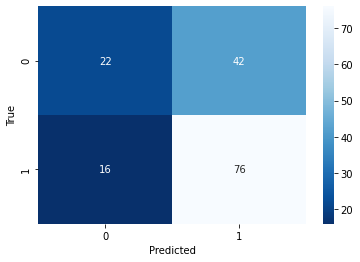

In [1225]:
# построение матрицы ошибок
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True')
plt.xlabel('Predicted');

### Анализ модели логистической регрессии

Метрика recall (recall = TP / TP + FN) измеряет, смогла ли модель предсказать, что молоко вкусное, когда оно действительно вкусное. Чем выше recall, тем больше прогнозов модель смогла дать верно // для нашей модели логистической регрессии recall = 0.83.

Метрика precision (precision = TP / TP + FP) показывает точность, с которой модель предсказывает, что молоко вкусное, когда в действительности оно является невкусным. Чем выше эта метрика, тем меньше таких случаев // для нашей модели логистической регрессии precision = 0.64.

Метрика accuracy (accuracy = TP + TN / TP + TN + FP + FN) характеризует качество модели, агрегированное по всем классам, показывает как точно модель предсказала, что молоков вкусное, когда оно действительно вкусное и невкусное, когда оно действительно невкусное // для нашей модели логистической регрессии accuracy = 0.63.

Изучив матрицу ошибок, видим следующие результаты:  
количество ошибок 1-го рода (FP) - 42  
количество ошибок 2-го рода (FN) - 16

---
Как известно, главным критерием для заказчика является вкусное молоко.  
Таким образом, *при покупке коров наиболее критичной будет ошибка 1-го рода*. 

Метрика recall зависит от ответов TP и FN. Ошибки второго рода (FN) в данной ситуации не критичны, так как нет ничего страшного в том, что мы не предложим фермеру несколько коров, у которых вкусное молоко. Гораздо хуже будет, если предложить невкусное.

Метрика precision зависит от ответов TP и FP. Количество ошибок первого рода (FP) нужно сводить к минимуму, так как они критичны. Таким образом, можно сделать вывод, что в данной ситуации *наиболее важной является метрика precision, которую нужно максимизировать*.

---
Сейчас модель допускает ошибку 1-го рода в 42 случаях. Наша цель - максимально уменьшить ошибки 1-го рода (FP) на валидации и тем самым увеличить precision выборки. Это мы сможем сделать, подобрав оптимальный порог принадлежности к классам.

### Подбор порога принадлежности к классам

>В целях оптимизации кода для расчета метрик для каждого порога создадим функцию **threshold_choice**:

на входе функция принимает список пороговых значений (threshold_list) и датафрейм, в котором содержатся объекты по убыванию вероятности их принадлежности к классу predict_proba() и правильные ответы (proba_df)  
результат работы функции - новый датафрейм, в котором содержатся объекты с рассчитанными метриками для каждого порога, с указанием для каждого порога количества FP, числа предсказанных объектов и количеством обьектов класса.

In [1226]:
# Функция расчета метрик для каждого порога
def threshold_choice(threshold_list, proba_df):
    result_df = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 'число_предсказанных_объектов',
                                      'всего_объектов_класса_1'])

    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)

        # precision
        precision = proba_df.loc[proba_df[column_name] == 1, 'y_valid'].mean()

        # число предсказанных объектов
        predicted_objects = proba_df[column_name].sum()

        # всего объектов класса 1
        total_objects_class_1 = proba_df['y_valid'].sum()

        # recall
        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 1)].shape[0] / total_objects_class_1

        # количество ложноположительных предсказаний (FP)
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 0)].shape[0]

        # добавляем результаты в датафрейм
        result_df = result_df.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

In [1227]:
# выведем объекты по убыванию вероятности их принадлежности к классу класса predict_proba() и правильные ответы
y_proba = clf.predict_proba(X_valid)[:, 1]

proba_data = pd.DataFrame(zip(y_valid, y_proba),
                          columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

y_valid   y_proba
130        1  0.858325
35         1  0.854741
48         1  0.850627
112        1  0.847558
5          1  0.835174

In [1228]:
# создадим копию датасета
proba_data_1 = proba_data.copy(deep=True)

# делим заданный промежуток от 0.1 до 1 на 10 более мелких
thresholds_1 = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]

columns = []

# перебор порогов
for i in thresholds_1:
    columns.append('y_pred_' + str(i))
    proba_data_1['y_pred_' + str(i)] = proba_data_1['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_1.head()

y_valid   y_proba  y_pred_0.1  y_pred_0.19  y_pred_0.28  y_pred_0.37  \
130        1  0.858325           1            1            1            1   
35         1  0.854741           1            1            1            1   
48         1  0.850627           1            1            1            1   
112        1  0.847558           1            1            1            1   
5          1  0.835174           1            1            1            1   

     y_pred_0.46  y_pred_0.55  y_pred_0.64  y_pred_0.73  y_pred_0.82  \
130            1            1            1            1            1   
35             1            1            1            1            1   
48             1            1            1            1            1   
112            1            1            1            1            1   
5              1            1            1            1            1   

     y_pred_0.91  
130            0  
35             0  
48             0  
112            0  
5              0

In [1229]:
threshold_choice(thresholds_1, proba_data_1)

порог  precision    recall  количество_FP  число_предсказанных_объектов  \
0   0.10   0.589744  1.000000           64.0                         156.0   
1   0.19   0.589744  1.000000           64.0                         156.0   
2   0.28   0.594771  0.989130           62.0                         153.0   
3   0.37   0.608108  0.978261           58.0                         148.0   
4   0.46   0.631579  0.913043           49.0                         133.0   
5   0.55   0.673267  0.739130           33.0                         101.0   
6   0.64   0.770492  0.510870           14.0                          61.0   
7   0.73   0.866667  0.282609            4.0                          30.0   
8   0.82   1.000000  0.086957            0.0                           8.0   
9   0.91        NaN  0.000000            0.0                           0.0   

   всего_объектов_класса_1  
0                     92.0  
1                     92.0  
2                     92.0  
3                     92.0  
4                     92.0  
5                     92.0  
6                     92.0  
7                     92.0  
8                     92.0  
9                     92.0

Заметим, что при пороговом значении ниже 0.64 количество FP большое, при этом значения выше 0.73 довольно сильно влияют на метрику recall.  
Далее рассмотрим интервал от 0.64 до 0.73 более детально.

In [1230]:
# создадим копию датасета
proba_data_2 = proba_data.copy(deep=True)

# делим промежуток от 0.64 до 0.73 на 10 более мелких
thresholds_2 = [round(i, 2) for i in np.linspace(0.64, 0.73, num=10, endpoint=False)]

columns = []

for i in thresholds_2:
    columns.append('y_pred_' + str(i))
    proba_data_2['y_pred_' + str(i)] = proba_data_2['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_2.head()

y_valid   y_proba  y_pred_0.64  y_pred_0.65  y_pred_0.66  y_pred_0.67  \
130        1  0.858325            1            1            1            1   
35         1  0.854741            1            1            1            1   
48         1  0.850627            1            1            1            1   
112        1  0.847558            1            1            1            1   
5          1  0.835174            1            1            1            1   

     y_pred_0.68  y_pred_0.69  y_pred_0.7  y_pred_0.71  y_pred_0.72  
130            1            1           1            1            1  
35             1            1           1            1            1  
48             1            1           1            1            1  
112            1            1           1            1            1  
5              1            1           1            1            1

In [1231]:
threshold_choice(thresholds_2, proba_data_2)

порог  precision    recall  количество_FP  число_предсказанных_объектов  \
0   0.64   0.770492  0.510870           14.0                          61.0   
1   0.65   0.779661  0.500000           13.0                          59.0   
2   0.66   0.789474  0.489130           12.0                          57.0   
3   0.67   0.773585  0.445652           12.0                          53.0   
4   0.68   0.764706  0.423913           12.0                          51.0   
5   0.68   0.764706  0.423913           12.0                          51.0   
6   0.69   0.812500  0.423913            9.0                          48.0   
7   0.70   0.853659  0.380435            6.0                          41.0   
8   0.71   0.837838  0.336957            6.0                          37.0   
9   0.72   0.828571  0.315217            6.0                          35.0   

   всего_объектов_класса_1  
0                     92.0  
1                     92.0  
2                     92.0  
3                     92.0  
4                     92.0  
5                     92.0  
6                     92.0  
7                     92.0  
8                     92.0  
9                     92.0

Таким образом, пороговое значение 0.70 - оптимальное, поскольку при нем мы минимизировали количество FP до 6, сохранив почти половину предсказанных объектов. Метрика recall при этом невысокая (0.38), но наша главная задача - повысить precision при низком количестве FP.

In [1232]:
# выделяем оптимальный порог
OPT_THRESHOLD = 0.70

# применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPT_THRESHOLD).astype(int)

# проводим оценку точности
clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)
clf_recall_new = recall_score(y_valid, y_pred_threshold)
clf_precision_new = precision_score(y_valid, y_pred_threshold)

# вывод результатов (до / после изменения пороговых значений)
print(f'accuracy before: {round(clf_accuracy, 2)} / accuracy after: {round(clf_accuracy_new, 2)}')
print(f'recall before: {round(clf_recall, 2)} / recall after: {round(clf_recall_new, 2)}')
print(f'precision before: {round(clf_precision, 2)} / precision after: {round(clf_precision_new, 2)}')

accuracy before: 0.63 / accuracy after: 0.6
recall before: 0.83 / recall after: 0.38
precision before: 0.64 / precision after: 0.85


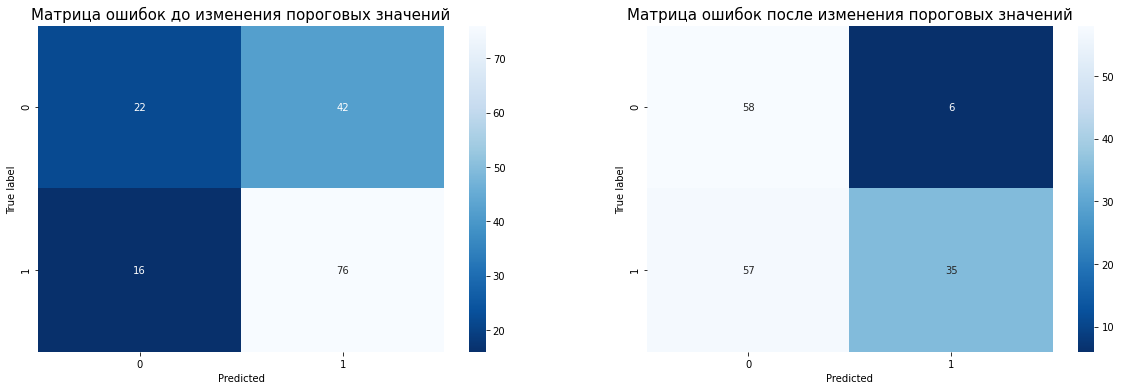

In [1233]:
# построение матрицы ошибок (до / после изменения пороговых значений)
cm_new = confusion_matrix(y_valid, y_pred_threshold)
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок до изменения пороговых значений', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted');

plt.subplot(1, 2, 2)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок после изменения пороговых значений', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted');

Результаты изменения пороговых значений:
* количество ошибок первого рода существенно снизилось (с 42 до 6)
* метрика accuracy практически не изменилась (0.63 / 0.6)
* метрика recall сильно уменьшилась (с 0.84 до 0.38)
* метрика precision увеличилась (с 0.64 до 0.85)

---
Далее создадим новую тренировочную выборку, на которой обучим модель с учетом новых пороговых значений и получим предсказания на тестовой выборке.


### Прогноз вкуса молока коров

In [1234]:
# создадим копию датасета
cows_2 = cows.copy(deep=True)

In [1235]:
# добавим недостающие признаки в датасет cows_2 и преобразуем их
cows_2['energy_feed_unit'] = new_values['energy_feed_unit']
cows_2['energy_feed_unit_2'] = cows_2['energy_feed_unit'] ** 2
cows_2['raw_protein_g'] = new_values['raw_protein_g']
cows_2['sugar_protein_ratio'] = new_values['sugar_protein_ratio']
cows_2['sugar_protein_ratio_cat'] = cows_2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)

In [1236]:
# форматируем cows_2
cows_2.rename(columns={'current_fat_pct': 'fat_pct', 'current_protein_pct': 'protein_pct'}, inplace=True)
cows_2 = cows_2.drop(['dad_name', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)
cows_2.head()

breed pasture_type dad_bull_breed  fat_pct  protein_pct  \
0     Вис Бик Айдиал    Холмистое         Айдиал     3.58        3.076   
1     Вис Бик Айдиал    Равнинное        Соверин     3.54        3.081   
2  Рефлекшн Соверинг    Равнинное        Соверин     3.59        3.074   
3  Рефлекшн Соверинг    Холмистое         Айдиал     3.40        3.061   
4  Рефлекшн Соверинг    Равнинное         Айдиал     3.64        3.074   

           age  energy_feed_unit_2  raw_protein_g  sugar_protein_ratio_cat  
0  более_2_лет          233.378833     2019.77191                        1  
1  менее_2_лет          233.378833     2019.77191                        1  
2  более_2_лет          233.378833     2019.77191                        1  
3  более_2_лет          233.378833     2019.77191                        1  
4  более_2_лет          233.378833     2019.77191                        1

In [1237]:
X_train_full.head()

raw_protein_g           breed pasture_type dad_bull_breed  fat_pct  \
0           1873  Вис Бик Айдиал    Холмистое         Айдиал     3.03   
1           2169  Вис Бик Айдиал    Равнинное         Айдиал     3.59   
2           1715  Вис Бик Айдиал    Холмистое        Соверин     3.73   
3           2172  Вис Бик Айдиал    Холмистое        Соверин     3.73   
4           1985  Вис Бик Айдиал    Равнинное        Соверин     3.62   

   protein_pct          age  sugar_protein_ratio_cat  energy_feed_unit_2  
0        3.080  более_2_лет                        0              153.76  
1        3.078  более_2_лет                        1              182.25  
2        3.078  более_2_лет                        1              249.64  
3        3.075  более_2_лет                        1              234.09  
4        3.078  менее_2_лет                        0              174.24

In [1238]:
# разделим признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'dad_bull_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['fat_pct', 'protein_pct', 'energy_feed_unit_2', 'raw_protein_g']

In [1239]:
# кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cows_2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [1240]:
# масштабируем количественные признаки с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cows_2[num_col_names])

In [1241]:
# собираем выборки
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [1242]:
clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
pred_final = (y_proba > OPT_THRESHOLD).astype(int)

In [1243]:
cows_2 = cows
cows_2['expected_milk_taste'] = pred_final
cows_2['expected_milk_taste'] = cows_2['expected_milk_taste'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
cows_2 # все коровы «ЭкоФермы», вкус молока каждой указан в столбце 'expected_milk_taste'

breed pasture_type dad_bull_breed  dad_name  current_fat_pct  \
0      Вис Бик Айдиал    Холмистое         Айдиал  Геркулес             3.58   
1      Вис Бик Айдиал    Равнинное        Соверин    Буйный             3.54   
2   Рефлекшн Соверинг    Равнинное        Соверин     Барин             3.59   
3   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный             3.40   
4   Рефлекшн Соверинг    Равнинное         Айдиал    Буйный             3.64   
5   Рефлекшн Соверинг    Равнинное        Соверин  Геркулес             3.63   
6      Вис Бик Айдиал    Равнинное        Соверин    Буйный             3.57   
7   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный             3.40   
8      Вис Бик Айдиал    Холмистое        Соверин  Соловчик             3.73   
9   Рефлекшн Соверинг    Равнинное        Соверин  Геркулес             3.73   
10     Вис Бик Айдиал    Холмистое         Айдиал  Геркулес             3.68   
11     Вис Бик Айдиал    Холмистое        Соверин     Барин             3.42   
12  Рефлекшн Соверинг    Холмистое         Айдиал    Буйный             3.40   
13     Вис Бик Айдиал    Холмистое        Соверин  Соловчик             3.73   
14  Рефлекшн Соверинг    Равнинное        Соверин  Геркулес             3.77   
15     Вис Бик Айдиал    Равнинное        Соверин    Буйный             3.34   

    current_protein_pct          age expected_milk_taste  
0                 3.076  более_2_лет              вкусно  
1                 3.081  менее_2_лет           не вкусно  
2                 3.074  более_2_лет           не вкусно  
3                 3.061  более_2_лет           не вкусно  
4                 3.074  более_2_лет           не вкусно  
5                 3.053  менее_2_лет           не вкусно  
6                 3.079  более_2_лет           не вкусно  
7                 3.079  менее_2_лет              вкусно  
8                 3.055  более_2_лет           не вкусно  
9                 3.073  более_2_лет           не вкусно  
10                3.046  более_2_лет           не вкусно  
11                3.075  менее_2_лет           не вкусно  
12                3.065  более_2_лет           не вкусно  
13                3.079  более_2_лет              вкусно  
14                3.053  менее_2_лет           не вкусно  
15                3.069  более_2_лет           не вкусно

In [1244]:
recommend_buy = cows_2.query('expected_milk_taste == "вкусно"')
recommend_buy # коровы, у которых вкусное молоко

breed pasture_type dad_bull_breed  dad_name  current_fat_pct  \
0      Вис Бик Айдиал    Холмистое         Айдиал  Геркулес             3.58   
7   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный             3.40   
13     Вис Бик Айдиал    Холмистое        Соверин  Соловчик             3.73   

    current_protein_pct          age expected_milk_taste  
0                 3.076  более_2_лет              вкусно  
7                 3.079  менее_2_лет              вкусно  
13                3.079  более_2_лет              вкусно

### Вывод

На этом шаге мы обучили модель логистической регрессии.  
В качестве целевого был использован признак 'milk_taste' (вкус молока).

Была проведена оценка качества модели на тестовой выборке: рассчитаны метрики accuracy, recall, precision, а также построена матрица ошибок.

Был проведен анализ модели логистической регрессии. Учитывая то, что главным критерием для заказчика является вкусное молоко, было выявлено, что при покупке коров наиболее критичной будет ошибка 1-го рода.

Метрика recall зависит от ответов TP и FN. Ошибки второго рода (FN) в данной ситуации не критичны, так как нет ничего страшного в том, что мы не предложим фермеру несколько коров, у которых вкусное молоко. Гораздо хуже будет, если предложить невкусное.

Метрика precision зависит от ответов TP и FP. Количество ошибок первого рода (FP) нужно сводить к минимуму, так как они критичны. Отметим, что в данной ситуации наиболее важной является метрика precision, которую нужно максимизировать.

Таким образом, была поставлена задача - *максимально уменьшить ошибки 1-го рода (FP) на валидации и тем самым увеличить precision выборки, что мы сделали при помощи корректировки порога принадлежности к классам*.

---
Было выявлено оптимальное пороговое значение 0.70 - при нем мы минимизировали количество ошибок 1-го рода (FP) до 6, сохранив почти половину предсказанных объектов. Значение метрики recall при этом снизилось, но наша главная цель была - повысить precision при низком количестве FP.

После изменения порога принадлежности к классам, была повторно проведена оценка качества модели.  
*Результаты (до / после изменения пороговых значений):*

* accuracy before = 0.63 / accuracy after = 0.6 (практически не изменилась)  
* recall before = 0.83 / recall after = 0.38 (уменьшилась)  
* precision before = 0.64 / precision after = 0.85 (увеличилась)

* количество ошибок 1-го рода (FP) - существенно снизилось с 42 до 6  
* количество ошибок 2-го рода (FN) - увеличилось с 16 до 57

С помощью обученной модели был спрогнозирован вкус молока коров «ЭкоФермы», которых фермер хочет купить.

Согласно известному критерию отбора (молоко должно быть вкусным), *на данном этапе мы можем рекомендовать фермеру к покупке только 3х коров из 16*.

---
**Подведем итоги:**

In [1245]:
cows_final = cows_1
# cows_1 - коровы «ЭкоФермы» с предсказанным показателем удоя 'expected_milk_yield_kg'

cows_final['expected_milk_taste'] = cows_2['expected_milk_taste']
# добавили новый столбец с предсказанным вкусом молока 'expected_milk_taste'

print('Все коровы «ЭкоФермы» с предсказанными показателями УДОЙ и ВКУС МОЛОКА')
cows_final

Все коровы «ЭкоФермы» с предсказанными показателями УДОЙ и ВКУС МОЛОКА


breed pasture_type dad_bull_breed  dad_name          age  \
0      Вис Бик Айдиал    Холмистое         Айдиал  Геркулес  более_2_лет   
1      Вис Бик Айдиал    Равнинное        Соверин    Буйный  менее_2_лет   
2   Рефлекшн Соверинг    Равнинное        Соверин     Барин  более_2_лет   
3   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  более_2_лет   
4   Рефлекшн Соверинг    Равнинное         Айдиал    Буйный  более_2_лет   
5   Рефлекшн Соверинг    Равнинное        Соверин  Геркулес  менее_2_лет   
6      Вис Бик Айдиал    Равнинное        Соверин    Буйный  более_2_лет   
7   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  менее_2_лет   
8      Вис Бик Айдиал    Холмистое        Соверин  Соловчик  более_2_лет   
9   Рефлекшн Соверинг    Равнинное        Соверин  Геркулес  более_2_лет   
10     Вис Бик Айдиал    Холмистое         Айдиал  Геркулес  более_2_лет   
11     Вис Бик Айдиал    Холмистое        Соверин     Барин  менее_2_лет   
12  Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  более_2_лет   
13     Вис Бик Айдиал    Холмистое        Соверин  Соловчик  более_2_лет   
14  Рефлекшн Соверинг    Равнинное        Соверин  Геркулес  менее_2_лет   
15     Вис Бик Айдиал    Равнинное        Соверин    Буйный  более_2_лет   

    energy_feed_unit_2  raw_protein_g  sugar_protein_ratio_cat  \
0           233.378833     2019.77191                        1   
1           233.378833     2019.77191                        1   
2           233.378833     2019.77191                        1   
3           233.378833     2019.77191                        1   
4           233.378833     2019.77191                        1   
5           233.378833     2019.77191                        1   
6           233.378833     2019.77191                        1   
7           233.378833     2019.77191                        1   
8           233.378833     2019.77191                        1   
9           233.378833     2019.77191                        1   
10          233.378833     2019.77191                        1   
11          233.378833     2019.77191                        1   
12          233.378833     2019.77191                        1   
13          233.378833     2019.77191                        1   
14          233.378833     2019.77191                        1   
15          233.378833     2019.77191                        1   

    expected_milk_yield_kg expected_milk_taste  
0              6584.562078              вкусно  
1              6314.585317           не вкусно  
2              6300.738656           не вкусно  
3              6594.628396           не вкусно  
4              6544.946909           не вкусно  
5              6371.251382           не вкусно  
6              6534.356462           не вкусно  
7              6374.857250              вкусно  
8              6350.834455           не вкусно  
9              6591.022528           не вкусно  
10             6584.562078           не вкусно  
11             6097.282806           не вкусно  
12             6594.628396           не вкусно  
13             6350.834455              вкусно  
14             6371.251382           не вкусно  
15             6534.356462           не вкусно

С помощью модели нужно отобрать коров по двум критериям:
1. средний удой за год - не менее 6000 кг
2. молоко должно быть вкусным

Таким образом, мы можем рекомендовать фермеру к покупке с минимальным риском для себя только 3х коров из 16 коров «ЭкоФермы».

In [1246]:
result = cows_final.query('expected_milk_yield_kg > 6000 and expected_milk_taste == "вкусно"')

print('Коровы «ЭкоФермы» с показателями: удой > 6000 кг / год; вкусное молоко')
result

Коровы «ЭкоФермы» с показателями: удой > 6000 кг / год; вкусное молоко


breed pasture_type dad_bull_breed  dad_name          age  \
0      Вис Бик Айдиал    Холмистое         Айдиал  Геркулес  более_2_лет   
7   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  менее_2_лет   
13     Вис Бик Айдиал    Холмистое        Соверин  Соловчик  более_2_лет   

    energy_feed_unit_2  raw_protein_g  sugar_protein_ratio_cat  \
0           233.378833     2019.77191                        1   
7           233.378833     2019.77191                        1   
13          233.378833     2019.77191                        1   

    expected_milk_yield_kg expected_milk_taste  
0              6584.562078              вкусно  
7              6374.857250              вкусно  
13             6350.834455              вкусно

## Шаг 7. Итоговые выводы

**Задачи исследования:**
* провести предобработку и анализ данных
* обучить несколько моделей линейной регрессии
* выбрать лучшую модель линейной регрессии, с помощью которой спрогнозировать удой
* обучить модель логистической регрессии и подобрать для нее оптимальное пороговое значение
* с помощью модели логистической регрессии спрогнозировать вкус молока коров
* сделать выводы, дать рекомендации

**Цели исследования:**
* создать две прогнозные модели для отбора бурёнок в поголовье:  
1. первая будет прогнозировать возможный удой коровы (целевой признак 'удой')  
2. вторая - рассчитывать вероятность получить вкусное молоко от коровы (целевой признак 'вкус молока')

* с помощью модели отобрать коров по двум критериям:  
1. средний удой за год — не менее 6000 килограммов  
2. молоко должно быть вкусным

**Данные для анализа:**

*ferma_main.csv* - датасет с данными о стаде фермера на текущий момент (предоставил владелец молочного хозяйства «Вольный луг»)  
*ferma_dad.csv* - датасет с именем папы каждой коровы в стаде фермера (предоставил владелец молочного хозяйства «Вольный луг»)  
*cow_buy.csv* - датасет с данными о коровах «ЭкоФермы» (данные предоставлены ассоциацией пастбищ «ЭкоФерма»)

---
**ШАГ 1 / ЗАГРУЗКА ДАННЫХ**

На этом этапе CSV-файлы с данными были считаны и сохранены в датафреймы herd, dad и cows. Было выявлено, что всех трех датафреймах отсутствуют пропущенные значения, типы данных корректные, но названия столбцов следует изменить и привести к единому виду.

---
**ШАГ 2 / ПРЕДОБРАБОТКА ДАННЫХ**

На данном этапе было следано следующее:

* названия столбцов были изменены и приведены к единому виду
* была проведена работа с дубликатами: в датафрейме herd было удалено 5 дубликатов, а в датафрейме cows - 4
* в датафрейме cows в столбце 'pasture_type' первые строчные буквы значений значения 'холмистое' и 'равнинное' изменили на прописные (привели в соответствие - возможно пригодится в дальнейшем)
* в датафреймах herd и cows в столбце 'breed' название породы 'РефлешнСоверинг' исправили на 'Рефлекшн Соверинг' (особого значения это не имеет, но это корректное написание)

---
**ШАГ 3 / ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**

Был проведен анализ всех количественных и категориальных переменных датасетов herd, dad и cows, построены соответствующие графики. В результате данные были очищены от выбросов и подготовлены к дальнейшему использованию.

**Датасет herd**

Удалены выбросы в столбце 'milk_yield_kg' - значение 45616 (1 строка), удалены выбросы в столбце 'protein_pct' - все значения ниже 3.070 и выше 3.0815 (5 строк / 0.8 % от всего датафрейма). В столбце 'fat_pct' выбросы (все значения параметра ниже 3.4) удалены не были, т.к. количество таких строк довольно большое - 86 строк (13.69 % от всего датафрейма) и их удаление может повлиять на результаты исследования


Распределения всех количественных признаков за исключением 'fat_pct' в датафрейме herd близки к нормальному. 

Распределение признака 'fat_pct' (жирность) не похоже на нормальное. Можно предположить, что это связано со спецификой признака. Если есть возможность, желательно уточнить, каким образом производили измерения. Возможно, прибор, с помощью которого производили измерения, настроен таким образом, что показывает значения только до определенного максимального (выше определенного значения - информации нет).

Распределение признака 'sugar_protein_ratio' похоже на нормальное ассиметричное, но в данных есть пропуски - можно предположить, что это также связано со спецификой признака. Если есть возможность, желательно уточнить, как расчитывали данный показатель, а именно - каким образом измеряли количество сахара и протеина в корме коровы. Возможно, пропуски в данных связаны с прибором, с помощью которого производили измерения (возможно, причина в его настройках).

В стаде есть коровы двух пород: Вис Бик Айдиал (368 коров / 59 % стада) и Рефлекшн Соверинг (255 коров / 41 % стада).  
Коровы пасутся на пастбищах двух типов: равнинном и холмистом, при этом большинство коров пасутся на холмистом (348 коров / 56 % стада), остальные - на равнинном (275 коров / 44 % стада).  
У одной половины стада - папа породы Айдиал (314 коровы), у другой - породы Соверин (309 коров).  
По оценкам фермера вкусное молоко у 366 коров (59 % стада), невкусное - у 257 коров (41 % стада).  
В стаде ~ в 5 раз больше коров возраста 'более 2 лет' (514 коров / 83 % стада), чем коров в возрасте 'менее 2 лет' (109 коров / 17 % стада).

---
**Датасет dad**

В стаде есть коровы-дочери от четырех разных отцов. Первое место по количеству дочерей в этом стаде занимает бык Барин (он папа 240 коров / 38 % стада), второе место - бык Буйный (215 коров / 34 %), третье место - бык Соловчик (110 коров / 17 %) и последнее место - Геркулес (всего 64 коровы / 10 %).

---
**Датасет cows**

Распределение признаков 'current_fat_pct' и 'current_protein_pct' не похоже на нормальное. Отметим, что в файле с данными, который предоставила «ЭкоФерма», содержание белков и жиров в молоке указано на момент продажи. Таким образом, в данные, которые были предоставлены для исследования, попали результаты только одного измерения, что объясняет такое распределение показателей.

Выбросы или аномальные значения признаков 'current_fat_pct' и 'current_protein_pct' не обнаружены.

«ЭкоФерма» предлагает коров двух пород: Вис Бик Айдиал (8 коров), Рефлекшн Соверинг(8 коров).  
Коровы пасутся на пастбищах двух типов: равнинном и холмистом (на каждом по 8 коров).  
У 10 коров «ЭкоФермы» (62 % всех коров) папа породы Соверин, а у 6 коров (38 %) - папа породы Айдиал.  
На «ЭкоФерме» есть коровы-дочери от четырех разных быков-отцов. Больше всего коров-дочерей у быка Буйный (он папа 7 коров / 44 % всех коров «ЭкоФермы»), второе место у быка Геркулес (5 коров / 31 %) и по 2 коровы-дочери у быков Барин и Соловичик (по 12 %).  
Коров возраста 'более 2 лет' в стаде больше практически в 2 раза: 11 коров 'более 2 лет' (69 % всех коров) и только 5 коров 'менее 2 лет' (31 %).

---
**ШАГ 4 / КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ПРИЗНАКОВ В ДАТАСЕТЕ HERD**

На этом этапе был проведен корреляционный анализ признаков - построена матрица корреляции и диаграммы рассеяния.

*Целевой* признак - удой ('milk_yield_kg'), *входные* - остальные количественные признаки: ЭКЕ ('energy_feed_unit'), сырой протеин ('raw_protein_g'), СПО ('sugar_protein_ratio'), процент жирности ('fat_pct') и процент содержания белка ('protein_pct'). 

Были изучены типы взаимосвязи между целевым и входными признаками:

* 'milk_yield_kg' (удой) / 'energy_feed_unit' (ЭКЕ) - сильная положительная взаимосвязь (коэффициент корелляции 0.76).  

Для коров с папой породы Соверин с ростом ЭКЕ удой растет чуть медленнее, чем для коров с папой породы Айдиал.

* 'milk_yield_kg' (удой) / 'raw_protein_g' (сырой протеин) - средняя положительная связь (коэффициент корелляции 0.45).  

На графике диаграмме рассеяния виден довольно большой разброс значений, однако наблюдается общий тренд на прямую пропорциональную зависимость.

* 'milk_yield_kg' (удой) / 'sugar_protein_ratio' (СПО) - сильная положительная взаимосвязь (коэффициент корелляции 0.81).  

Связь похожа на нелинейную, на графиках видим, что наблюдения сгруппированы в два кластера и есть явная точка перегиба, после которой функция начинает расти (значение 0.9). Также заметим, что данные могут принимать только фиксированные значения, что обьясняет такой вид графика.

* 'milk_yield_kg' (удой) / 'fat_pct' (процент жирности молока) - средняя положительная взаимосвязь (коэффициент корелляции 0.6). 

Заметим, что в основном данные могут принимать только фиксированные значения, что обьясняет такой вид графика.

* 'milk_yield_kg' (удой) / 'protein_pct' (процент содержания белка в молоке) - очень слабая связь (коэффициент корелляции 0.0023)  

Также заметим, что данные могут принимать только фиксированные значения, что обьясняет такой вид графика.

Отметим, что для коров возраста менее двух лет значение показателя удой практически не изменяется с увеличением значений входных признаков (между показателями практически нет никакой зависимости). Предположительно это можно объяснить особенностями молодого организма, в котором все обменные процессы протекают иначе, чем у взрослых коров. 

Были выявлены нелинейные связи между следующими признаками (целевым и входными): 
  
* 'milk_yield_kg' (удой) и 'energy_feed_unit' (ЭКЕ)   
* 'milk_yield_kg' (удой) / 'sugar_protein_ratio' (СПО)  
* 'milk_yield_kg' (удой) / 'fat_pct' (процент жирности молока)  
* 'milk_yield_kg' (удой) / 'protein_pct'

Для того, чтобы признаки были информативны для линейной регрессии, необходимо исключить нелинейность:

* признаки 'fat_pct' (жирность молока) и 'protein_pct' (процент содержания белков в молоке) при обучении модели линейной регрессии следует удалить, поскольку это характеристики молока и напрямую с целевым признаком они не связаны

* чтобы устранить нелинейность связи между 'milk_yield_kg' (удой) / 'sugar_protein_ratio' (СПО), можно ввести новую категориальную переменную и преобразовать признак 'sugar_protein_ratio' в категориальный бинарный (это возможно так как, как мы уже отметили ранее, наблюдения сгруппированы в два кластера с границей 0.91)

* нелинейную связь между признаками 'milk_yield_kg' (удой) и 'energy_feed_unit' (ЭКЕ) можно исключить, если ввести новый признак 'energy_feed_unit' в квадрате

Между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой необходимо справляться.

---
**ШАГ 5 / ОБУЧЕНИЕ МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ**

На этом шаге мы обучили три модели линейной регрессии.  
В качестве целевого был использован признак 'milk_yield_kg' (удой).

Для *первой модели* мы отобрали подходящие признаки, опираясь на на причинно-следственные связи между целевым (удой) и признаками, характеризующими корову, корм и пастбище. Признаки 'fat_pct' (жирность молока), 'protein_pct' (процент содержания белков в молоке) и 'milk_taste' (вкус молока) для обучения линейной регрессии мы не использовали, так как это характеристики молока и напрямую с целевым признаком (удоем) они не свзяаны. Признак 'id' для обучения модели также неактуален.

Подходящие признаки для *второй модели* мы подобрали с учётом их связи с целевым. Признаки 'sugar_protein_ratio' (СПО) и 'energy_feed_unit' (ЭКЕ) связаны с целевым нелинейно, что можно увидеть, изучив диаграммы рассеяния.  

Для того, чтобы эти признаки были информативны для линейной регрессии, мы исключили нелинейность:
* количественный признак 'sugar_protein_ratio' преобразовали в категориальный бинарный, использовав границу 0.91 (на диаграмме рассеяния видно, что наблюдения сгруппированы в два кластера, причём значение 'sugar_protein_ratio' = 0.91 можно считать границей между ними)
* ввели новый признак 'energy_feed_unit' (ЭКЕ) в квадрате

Для *третьей модели* мы добавили признак 'dad_name' (имя папы-быка) из датасета dad, соединив его с остальными данными по ключу.

Была проведена оценка качества каждой модели на тестовой выборке: рассчитан коэффициент детерминации R², проведен анализ остатков с помощью графиков (гистограмма распределения и диаграммы рассеяния). Также была проведена оценка качества каждой модели по трём метрикам: MSE, MAE, RMSE.

В результате было выявлено, что *лучшая модель - третья*.  

---

Для третьей модели:

* коэффициент детерминации R² = 0.84  
* среднее значение остатков = 16.98  
* среднеквадратичная ошибка MSE = 34749.38  
* корень среднеквадратичной ошибки RMSE = 186.41  
* средняя абсолютная ошибка MAE = 146.72  
* Байесовский доверительный интервал = ( 5327.63 , 6741.08 )

---
С помощью третьей модели были спрогнозирован удой всех коров, которых фермер хочет купить. 

Согласно известному критерию отбора (средний удой за год - не менее 6000 кг), **на данном этапе мы получили результат: к покупке рекомендована любая из 16 коров «ЭкоФермы», т.к. у всех коров прогнозируемое значения удоя составило более 6000 кг / год**.

---
**ШАГ 6 / ОБУЧЕНИЕ МОДЕЛИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

На этом шаге мы обучили модель логистической регрессии.  
В качестве целевого был использован признак 'milk_taste' (вкус молока).

Была проведена оценка качества модели на тестовой выборке: рассчитаны метрики accuracy, recall, precision, а также построена матрица ошибок.

Был проведен анализ модели логистической регрессии. Учитывая то, что главным критерием для заказчика является вкусное молоко, было выявлено, что при покупке коров наиболее критичной будет ошибка 1-го рода.

Метрика recall зависит от ответов TP и FN. Ошибки второго рода (FN) в данной ситуации не критичны, так как нет ничего страшного в том, что мы не предложим фермеру несколько коров, у которых вкусное молоко. Гораздо хуже будет, если предложить невкусное.

Метрика precision зависит от ответов TP и FP. Количество ошибок первого рода (FP) нужно сводить к минимуму, так как они критичны. Отметим, что в данной ситуации наиболее важной является метрика precision, которую нужно максимизировать.

Таким образом, была поставлена задача - *максимально уменьшить ошибки 1-го рода (FP) на валидации и тем самым увеличить precision выборки, что мы сделали при помощи корректировки порога принадлежности к классам*.

---
Было выявлено оптимальное пороговое значение 0.70 - при нем мы минимизировали количество ошибок 1-го рода (FP) до 6, сохранив почти половину предсказанных объектов. Значение метрики recall при этом снизилось, но наша главная цель была - повысить precision при низком количестве FP.

После изменения порога принадлежности к классам, была повторно проведена оценка качества модели.  
*Результаты (до / после изменения пороговых значений):*

* accuracy before = 0.63 / accuracy after = 0.6 (практически не изменилась)  
* recall before = 0.83 / recall after = 0.38 (уменьшилась)  
* precision before = 0.64 / precision after = 0.85 (увеличилась)

* количество ошибок 1-го рода (FP) - существенно снизилось с 42 до 6  
* количество ошибок 2-го рода (FN) - увеличилось с 16 до 57

С помощью обученной модели был спрогнозирован вкус молока коров «ЭкоФермы», которых фермер хочет купить.

Согласно известному критерию отбора (молоко должно быть вкусным), **на данном этапе мы получили результат: к покупке рекомендовано 3 коровы из 16, т.к. только у 3х коров по прогнозам вкусное молоко**.

---
**РЕКОМЕНДАЦИИ**

Владельцу молочного хозяйства «Вольный луг» рекомендуем к покупке только 3х коров из 16 коров «ЭкоФермы».

In [1247]:
print('Коровы «ЭкоФермы» с показателями: удой > 6000 кг / год; вкусное молоко')
result

Коровы «ЭкоФермы» с показателями: удой > 6000 кг / год; вкусное молоко


breed pasture_type dad_bull_breed  dad_name          age  \
0      Вис Бик Айдиал    Холмистое         Айдиал  Геркулес  более_2_лет   
7   Рефлекшн Соверинг    Холмистое         Айдиал    Буйный  менее_2_лет   
13     Вис Бик Айдиал    Холмистое        Соверин  Соловчик  более_2_лет   

    energy_feed_unit_2  raw_protein_g  sugar_protein_ratio_cat  \
0           233.378833     2019.77191                        1   
7           233.378833     2019.77191                        1   
13          233.378833     2019.77191                        1   

    expected_milk_yield_kg expected_milk_taste  
0              6584.562078              вкусно  
7              6374.857250              вкусно  
13             6350.834455              вкусно

**Фермеру также можно дать следующие рекомендации:** в дальнейшем для подобного анализа можно расширить спискок рассматриваемых показателей - добавить такие показатели как, например, кормовые добавки и использование пробиотиков, болезни коровы, регион рождения, сезон отела. Но тут возможна небольшая сложность, связанная со сбором и обработкой информации - данные должны быть не только о своих коровах (коровах молочного хозяйства «Вольный луг»), но и о тех коровах, которые он собирается купить.

Внедрение в рацион *кормовых добавок* позволяют повысить количество и качество молока (тут речь сразу о двух показателях – удой и вкус). Витаминно-минеральные комплексы и другие добавки для коров не только содержат все необходимые вещества, но и способствуют лучшему усвоению корма, улучшают общее состояние животного, повышают стрессоустойчивость и иммунитет.

Использование *пробиотиков* – аналогично, также позволяет повысить количество и качество молока (удой и вкус), поскольку эти препараты благотворно сказываются на работу пищеварительной системы, улучшая общее физическое состояние коровы, ее способность переваривать корм и получать из него максимум пользы.

*Болезни* коровы могут давать горьковатый привкус молоку (вкус).

Есть теория, что *регион рождения* коровы влияет на вкус ее молока - некоторые производители, помимо стандартной информации, указывают на упаковке породу коровы и регион её рождения (вкус).

*Сезон отёла* - у коров, отелившихся весной или летом, содержание жира и белка в молоке несколько выше, чем у коров осеннего и зимнего отёлов (вкус).

---
**У фермера оптимально уточнить следующие моменты по поводу данных:**
    
При исследовательском анализе показателя СПО / cахаро-протеиновое соотношение - это отношение сахара к протеину в корме коровы ('sugar_protein_ratio') было выявлено, что в данных есть пропуски. Одна из предположительных причин - это специфика признака. Но я бы уточнила у фермера, как рассчитывался данный показатель, а именно - каким образом измерялось количество сахара и протеина в корме коровы. Возможно, пропуски в данных связаны с прибором, с помощью которого производили измерения (возможно, причина в его настройках / погрешности измерения).

При исследовательском анализе показателя процент жирности молока ('fat_pct') было выявлено, что распределение не похоже на нормальное (кажется логичным, что оно должно быть нормальным). Я бы также уточнила у фермера, каким образом измерялся данный показатель. Возможно, прибор, с помощью которого производили измерения, настроен таким образом, что показывает значения только до определенного максимального (выше определенного значения - информации нет).

---
**ВЫВОДЫ О МОДЕЛЯХ ЛИНЕЙНОЙ РЕГРЕССИИ И ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

**Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?**

*При построении модели линейной регрессии:*

* мы убрали из рассмотрения те характеристики, которые не связаны напрямую с целевым, предварительно изучив связь признаков (в нашей задаче удалили столбцы 'fat_pct', 'protein_pct' для построения линейной регрессии)
* исключили те признаки, которые связаны с целевым нелинейно - ввели новые признаки в результате преобразований (в нашей задаче количественный признак 'sugar_protein_ratio' преобразовали в категориальный бинарный, ввели новый признак 'energy_feed_unit' в квадрате)
* добавили новый новый признак, который связан с целевым (в нашей задаче мы добавили 'dad_name' по ключу из датасета dad) 

*При построении модели логистической регрессии:*

* подобрали оптимальный порог принадлежности к классам (в нашем случае мы подбирали порог, ориентируясь на цель - максимально уменьшить ошибки 1-го рода, тем самым увеличив precision выборки)

**Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?**

В принципе, полученная регрессионная модель показывает неплохие результаты:

R² = 0.84  
среднее значение остатков = 16.98  
среднеквадратичная ошибка MSE = 34749.38  
корень среднеквадратичной ошибки RMSE = 186.41  
средняя абсолютная ошибка MAE = 146.72  
(модель линейной регрессии)

accuracy = 0.6   
recall = 0.38   
precision = 0.85   
(модель логической регрессии)

Мы уже использовали некоторые способы улучшения качества модели, в результате удаления нелинейности / введения новых признаков нам удалось значительно улучшить нашу линейную модель, о чем свидетельствуют метрики. Аналогично, логистическая модель стала гораздо более качественной после подбора оптимального порога принадлежности к классам.

Но нет предела совершенству!! =) Думаю, что можно было попробовать "поиграть" признаками, обучить еще несколько моделей, из которых выбрать наилучшую.

---
**Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?**

**Метрика recall** (recall = TP / TP + FN) измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Предсказания False Negative рассматриваются метрикой как «неучтённые» True Positive. Чем выше recall, тем больше прогнозов Positive модель смогла дать верно // *например, recall подскажет, все ли дефолты удалось предугадать*


**Метрика precision** (precision = TP / TP + FP) показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Иными словами, precision определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0. Чем выше эта метрика, тем меньше таких случаев // *например, precision покажет, всегда ли модель верно предсказывает дефолт клиента*

**Метрика accuracy** (accuracy = TP+TN / TP + TN + FP + FN) характеризует качество модели, агрегированное по всем классам (применимо в тех случаях, когда классы для нас имеют одинаковое значение)